## Environment Configuration

**Set your environment here:**
- `ENV = "LOCAL"` - For local machine or Docker
- `ENV = "COLAB"` - For Google Colab (data will be loaded from GitHub)

**If you're running this notebook in:**
- **Docker**: Set `ENV = "LOCAL"` and ensure data directory is mounted
- **Google Colab**: Set `ENV = "COLAB"` and data will be downloaded from GitHub automatically
- **Local machine**: Set `ENV = "LOCAL"` (default)

In [1]:
# Environment Configuration
import os
import sys
from pathlib import Path

# ============================================================================
# SET YOUR ENVIRONMENT HERE: "LOCAL" or "COLAB"
# ============================================================================
ENV = os.environ.get('ENV', 'LOCAL')  # Default to LOCAL, can be set via environment variable

# Auto-detect Colab
try:
    import google.colab
    ENV = 'COLAB'
    print("✓ Google Colab detected - setting ENV to 'COLAB'")
except ImportError:
    if ENV == 'COLAB':
        print("⚠️  ENV set to 'COLAB' but not running in Colab")
    else:
        print(f"✓ Running in local environment (ENV = '{ENV}')")

print("="*80)
print("ENVIRONMENT CONFIGURATION")
print("="*80)
print(f"Environment: {ENV}")
print(f"Python version: {sys.version.split()[0]}")
print(f"Python executable: {sys.executable}")

# Check if running in Docker
is_docker = os.path.exists('/.dockerenv') or os.path.exists('/proc/1/cgroup')
print(f"Running in Docker: {is_docker}")

# GitHub repository URLs for Colab
GITHUB_REPO = "idarapatrick/Drug-Reviews-NLP-With-Multiple-Embeddings"
GITHUB_BRANCH = "main"
GITHUB_DATA_BASE_URL = f"https://raw.githubusercontent.com/{GITHUB_REPO}/{GITHUB_BRANCH}/data"

# Data file URLs (for Colab)
DATA_URLS = {
    'train': f"{GITHUB_DATA_BASE_URL}/drug_review_train.csv",
    'val': f"{GITHUB_DATA_BASE_URL}/drug_review_validation.csv",
    'test': f"{GITHUB_DATA_BASE_URL}/drug_review_test.csv"
}

print(f"\nData source:")
if ENV == 'COLAB':
    print(f"  Mode: GitHub (Colab)")
    print(f"  Base URL: {GITHUB_DATA_BASE_URL}")
    for key, url in DATA_URLS.items():
        print(f"  {key}: {url}")
else:
    print(f"  Mode: Local files")

print("="*80)

✓ Google Colab detected - setting ENV to 'COLAB'
ENVIRONMENT CONFIGURATION
Environment: COLAB
Python version: 3.12.12
Python executable: /usr/bin/python3
Running in Docker: True

Data source:
  Mode: GitHub (Colab)
  Base URL: https://raw.githubusercontent.com/idarapatrick/Drug-Reviews-NLP-With-Multiple-Embeddings/main/data
  train: https://raw.githubusercontent.com/idarapatrick/Drug-Reviews-NLP-With-Multiple-Embeddings/main/data/drug_review_train.csv
  val: https://raw.githubusercontent.com/idarapatrick/Drug-Reviews-NLP-With-Multiple-Embeddings/main/data/drug_review_validation.csv
  test: https://raw.githubusercontent.com/idarapatrick/Drug-Reviews-NLP-With-Multiple-Embeddings/main/data/drug_review_test.csv


## Colab Setup (Run this cell first if ENV == 'COLAB')

**Only needed for Google Colab** - This cell will:
1. Install required packages
2. Clone the repository to access source modules
3. Set up the environment

In [2]:
# Colab-specific setup (only runs if ENV == 'COLAB')
if ENV == 'COLAB':
    print("="*80)
    print("GOOGLE COLAB SETUP")
    print("="*80)

    # Install required packages
    print("\n1. Installing required packages...")
    import subprocess
    import sys

    packages = [
        'pandas', 'numpy', 'scikit-learn', 'matplotlib', 'seaborn',
        'gensim', 'tensorflow', 'scipy'
    ]

    for pkg in packages:
        try:
            __import__(pkg)
            print(f"  ✓ {pkg} already installed")
        except ImportError:
            print(f"  Installing {pkg}...")
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
            print(f"  ✓ {pkg} installed")

    # Clone repository for source modules
    print("\n2. Setting up repository...")
    repo_path = Path('/content/Drug-Reviews-NLP-With-Multiple-Embeddings')

    if not (repo_path / 'src').exists():
        print("  Cloning repository...")
        try:
            subprocess.run(['git', 'clone', f'https://github.com/{GITHUB_REPO}.git', str(repo_path)],
                         check=True, capture_output=True)
            print(f"  ✓ Repository cloned to {repo_path}")
        except subprocess.CalledProcessError as e:
            print(f"  ⚠️  Git clone failed: {e}")
            print("  You may need to manually clone or upload the src/ and embeddings/ directories")
    else:
        print(f"  ✓ Repository already exists at {repo_path}")

    # Add to path
    sys.path.insert(0, str(repo_path))
    print(f"  ✓ Added {repo_path} to Python path")

    print("\n" + "="*80)
    print("COLAB SETUP COMPLETE")
    print("="*80)
else:
    print("Skipping Colab setup (ENV != 'COLAB')")

GOOGLE COLAB SETUP

1. Installing required packages...
  ✓ pandas already installed
  ✓ numpy already installed
  Installing scikit-learn...
  ✓ scikit-learn installed
  ✓ matplotlib already installed
  ✓ seaborn already installed
  Installing gensim...
  ✓ gensim installed
  ✓ tensorflow already installed
  ✓ scipy already installed

2. Setting up repository...
  Cloning repository...
  ✓ Repository cloned to /content/Drug-Reviews-NLP-With-Multiple-Embeddings
  ✓ Added /content/Drug-Reviews-NLP-With-Multiple-Embeddings to Python path

COLAB SETUP COMPLETE


## Quick Start Guide

### For Google Colab:
1. **Set ENV to 'COLAB'** in the environment configuration cell above (or it will auto-detect)
2. **Run the Colab Setup cell** (cell above) to install dependencies and clone repository
3. **Run all cells** - data will be automatically downloaded from GitHub

### For Local/Docker:
1. **Set ENV to 'LOCAL'** (default) in the environment configuration cell
2. **Ensure data files exist** in `data/` directory
3. **Run all cells** - will use local file paths

**Note:** The notebook automatically detects Colab environment, so you may not need to manually set ENV.

# RNN Models for Drug Reviews Classification with Multiple Embeddings

**Team Member:** Patrick  
**Model:** RNN (Recurrent Neural Network / SimpleRNN)  
**Embeddings:** TF-IDF, Word2Vec Skip-gram, Word2Vec CBOW

---

## Objectives
1. Implement RNN architecture for binary drug review sentiment classification
2. Train RNN with at least 3 different embedding techniques (TF-IDF, Skip-gram, CBOW)
3. Perform systematic hyperparameter tuning for optimal performance
4. Document all experiments with academic rigor
5. Compare embedding performance and save results for team analysis

**Research Question:** How do different word embedding techniques (TF-IDF vs. Word2Vec Skip-gram vs. Word2Vec CBOW) impact the performance of RNN models for drug review sentiment classification?

**Dataset:** Drug Reviews from UCI Machine Learning Repository (Drugs.com)
- **Task:** Binary Sentiment Classification
- **Positive:** Rating >= 7
- **Negative:** Rating <= 4
- **Neutral:** Rating 5-6 (excluded)

## 0. Install/Verify TensorFlow (Run this cell separately if needed)

**Note:** If TensorFlow installation is taking too long, you can:
1. Run this cell separately in a terminal: `pip install tensorflow==2.13.0`
2. Or uncomment and run the installation command below
3. Then restart the kernel and continue with the next cells

In [3]:
# OPTIONAL: Install/Reinstall TensorFlow if having issues
# If you're getting "No module named 'tensorflow.keras'" errors, uncomment and run:
# !pip install --upgrade --force-reinstall tensorflow==2.13.0
# Then restart the kernel (Kernel -> Restart Kernel)

# Verify TensorFlow installation (this may take a moment on first run)
import sys
import subprocess

def check_tensorflow():
    """Check if TensorFlow is installed and accessible"""
    try:
        import tensorflow as tf
        # Try to get version - handle different TF versions
        try:
            version = tf.__version__
        except AttributeError:
            # Try alternative way to get version
            try:
                version = tf.version.VERSION
            except:
                version = "unknown (may be corrupted)"
        print(f"✓ TensorFlow {version} is installed")

        # Verify keras is accessible
        try:
            import tensorflow.keras
            print("✓ tensorflow.keras is accessible")
        except (ImportError, AttributeError) as e:
            print(f"⚠️  Warning: tensorflow.keras not accessible: {e}")
            print("  TensorFlow installation may be incomplete")
            print("  Try: pip install --upgrade --force-reinstall tensorflow==2.13.0")
            return False

        return True
    except ImportError:
        print("✗ TensorFlow is not installed")
        print("  Run: pip install tensorflow==2.13.0")
        return False
    except Exception as e:
        print(f"✗ Error checking TensorFlow: {e}")
        print("  Try: pip install --upgrade --force-reinstall tensorflow==2.13.0")
        return False

# Check TensorFlow
tf_installed = check_tensorflow()

if not tf_installed:
    print("\n⚠️  Please install TensorFlow before continuing:")
    print("   Option 1: Run in terminal: pip install tensorflow==2.13.0")
    print("   Option 2: Uncomment the pip install line above and run this cell")
else:
    print("✓ Ready to proceed with imports")

✓ TensorFlow 2.19.0 is installed
✓ tensorflow.keras is accessible
✓ Ready to proceed with imports


## 1. Environment Setup

In [4]:
# Import libraries
import os
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up paths FIRST before importing TensorFlow
# Handle local, Docker, and Colab environments
notebook_dir = Path('.').resolve()


if ENV == 'COLAB':
    # Colab: Clone repository or set up paths
    project_root = Path('/content/Drug-Reviews-NLP-With-Multiple-Embeddings')

    # Clone repo if not exists (for src modules)
    if not (project_root / 'src').exists():
        print("Cloning repository for source modules...")
        import subprocess
        subprocess.run(['git', 'clone', f'https://github.com/{GITHUB_REPO}.git', str(project_root)], check=False)

    sys.path.insert(0, str(project_root))
    print(f'✓ Colab environment: {project_root}')
else:
    # Local/Docker: Handle both notebooks directory and root
    if notebook_dir.name == 'notebooks':
        project_root = notebook_dir.parent
    else:
        # If running from project root, use current directory
        project_root = notebook_dir

    sys.path.insert(0, str(project_root))

    # Verify data directory exists (for local/Docker)
    data_dir = project_root / 'data'
    if not data_dir.exists():
        print(f"⚠️  Warning: Data directory not found at {data_dir}")
        print(f"   Current directory: {notebook_dir}")
        print(f"   Project root: {project_root}")
        print(f"   Please ensure data directory is accessible")
    else:
        print(f'✓ Project root: {project_root}')
        print(f'✓ Data directory: {data_dir}')

# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time

# Configure TensorFlow to avoid hanging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow info and warning messages
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'  # Disable oneDNN optimizations that can cause hangs

# TensorFlow and Keras (import after environment setup)
try:
    import tensorflow as tf
    # Try to get version
    try:
        tf_version = tf.__version__
    except AttributeError:
        try:
            tf_version = tf.version.VERSION
        except:
            tf_version = "unknown"
    print(f'✓ TensorFlow version: {tf_version}')
except ImportError as e:
    print(f'✗ Error importing TensorFlow: {e}')
    print('  Please install TensorFlow: pip install tensorflow==2.13.0')
    raise

# Import Keras modules - try multiple methods
keras_imported = False

# Method 1: Try tensorflow.keras (standard TF 2.x)
try:
    from tensorflow.keras.models import Sequential, Model
    from tensorflow.keras.layers import Dense, SimpleRNN, Embedding, Dropout, Input, Reshape
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
    from tensorflow.keras.optimizers import Adam
    print('✓ TensorFlow Keras modules imported successfully')
    keras_imported = True
except (ImportError, AttributeError, ModuleNotFoundError) as e1:
    print(f'⚠️  Method 1 failed: {e1}')

    # Method 2: Try importing keras module first, then accessing models
    try:
        import tensorflow.keras as keras
        from tensorflow.keras import models, layers, preprocessing, callbacks, optimizers
        Sequential = models.Sequential
        Model = models.Model
        Dense = layers.Dense
        SimpleRNN = layers.SimpleRNN
        Embedding = layers.Embedding
        Dropout = layers.Dropout
        Input = layers.Input
        Reshape = layers.Reshape
        pad_sequences = preprocessing.sequence.pad_sequences
        Tokenizer = preprocessing.text.Tokenizer
        EarlyStopping = callbacks.EarlyStopping
        ReduceLROnPlateau = callbacks.ReduceLROnPlateau
        ModelCheckpoint = callbacks.ModelCheckpoint
        Adam = optimizers.Adam
        print('✓ TensorFlow Keras imported via alternative method')
        keras_imported = True
    except Exception as e2:
        print(f'⚠️  Method 2 failed: {e2}')

        # Method 3: Try standalone keras (if installed)
        try:
            import keras
            from keras.models import Sequential, Model
            from keras.layers import Dense, SimpleRNN, Embedding, Dropout, Input, Reshape
            from keras.preprocessing.sequence import pad_sequences
            from keras.preprocessing.text import Tokenizer
            from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
            from keras.optimizers import Adam
            print('✓ Using standalone Keras (not recommended but will work)')
            keras_imported = True
        except ImportError as e3:
            print(f'✗ All import methods failed')
            print(f'  Method 1 error: {e1}')
            print(f'  Method 2 error: {e2}')
            print(f'  Method 3 error: {e3}')
            print('\n⚠️  TensorFlow/Keras installation appears incomplete.')
            print('  Please try:')
            print('  1. Restart the kernel (Kernel -> Restart Kernel)')
            print('  2. If that doesn\'t work, reinstall: pip install --upgrade --force-reinstall tensorflow==2.13.0')
            print('  3. For Apple Silicon Macs, you may need: pip install tensorflow-macos')
            raise ImportError('Cannot import Keras. Please restart kernel or reinstall TensorFlow.') from e1
    print('✓ Using standalone Keras')

# Import custom modules
try:
    from src.preprocessing_pipeline import prepare_datasets
    from embeddings.word2vec_embedding import Word2VecEmbedding, get_word2vec_embedding
    from embeddings.tfidf_embedding import TfidfEmbedding
    print('✓ Custom modules imported successfully')
except ImportError as e:
    if ENV == 'COLAB':
        print(f'⚠️  Import error in Colab: {e}')
        print('  Make sure you ran the Colab setup cell above')
        print('  Or manually clone: !git clone https://github.com/{GITHUB_REPO}.git')
    else:
        print(f'⚠️  Import error: {e}')
        print('  Make sure src/ and embeddings/ directories are in the project root')
    raise

# Set random seeds for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

print(f'✓ TensorFlow version: {tf.__version__}')
try:
    gpu_available = len(tf.config.list_physical_devices('GPU')) > 0
    print(f'✓ GPU available: {gpu_available}')
except:
    print('✓ GPU check completed')
print('✓ Setup complete!')

✓ Colab environment: /content/Drug-Reviews-NLP-With-Multiple-Embeddings
✓ TensorFlow version: 2.19.0
✓ TensorFlow Keras modules imported successfully
✓ Custom modules imported successfully
✓ TensorFlow version: 2.19.0
✓ GPU available: False
✓ Setup complete!


## 2. Configuration and Hyperparameters

In [5]:
# Data paths - set based on environment
if ENV == 'COLAB':
    # For Colab: Download data from GitHub if not already downloaded
    import urllib.request

    # Create data directory in Colab
    data_dir = Path('/content/data')
    data_dir.mkdir(exist_ok=True)

    def download_file(url, dest_path):
        """Download file from URL if it doesn't exist"""
        if not dest_path.exists():
            print(f"Downloading {url}...")
            urllib.request.urlretrieve(url, dest_path)
            print(f"✓ Downloaded to {dest_path}")
        else:
            print(f"✓ File already exists: {dest_path}")

    # Download data files
    print("Downloading data files from GitHub...")
    download_file(DATA_URLS['train'], data_dir / 'drug_review_train.csv')
    download_file(DATA_URLS['val'], data_dir / 'drug_review_validation.csv')
    download_file(DATA_URLS['test'], data_dir / 'drug_review_test.csv')

    DATA_PATH_TRAIN = str(data_dir / 'drug_review_train.csv')
    DATA_PATH_VAL = str(data_dir / 'drug_review_validation.csv')
    DATA_PATH_TEST = str(data_dir / 'drug_review_test.csv')

    print(f"\n✓ Data files ready in Colab:")
    print(f"  Train: {DATA_PATH_TRAIN}")
    print(f"  Val:   {DATA_PATH_VAL}")
    print(f"  Test:  {DATA_PATH_TEST}")
else:
    # For local/Docker: Use local file paths
    DATA_PATH_TRAIN = str(project_root / 'data' / 'drug_review_train.csv')
    DATA_PATH_VAL = str(project_root / 'data' / 'drug_review_validation.csv')
    DATA_PATH_TEST = str(project_root / 'data' / 'drug_review_test.csv')

    print(f"\n✓ Using local data files:")
    print(f"  Train: {DATA_PATH_TRAIN}")
    print(f"  Val:   {DATA_PATH_VAL}")
    print(f"  Test:  {DATA_PATH_TEST}")

# Model hyperparameters
BATCH_SIZE = 32
EPOCHS = 100
LEARNING_RATE = 0.001
RNN_UNITS_1 = 64  # First RNN layer units
RNN_UNITS_2 = 32  # Second RNN layer units
DROPOUT_RATE = 0.3
EARLY_STOPPING_PATIENCE = 10
REDUCE_LR_PATIENCE = 5

# Embedding configurations
EMBEDDING_DIMS = {
    'word2vec_skipgram': 200,  # Using medium config
    'word2vec_cbow': 200,       # Using medium config
    'tfidf': 2000               # From preprocessing pipeline
}

# Word2Vec training parameters
W2V_WINDOW_SIZE = 8
W2V_MIN_COUNT = 2
W2V_WORKERS = 4

print("Configuration loaded:")
print(f"  Batch size: {BATCH_SIZE}")
print(f"  Max epochs: {EPOCHS}")
print(f"  Learning rate: {LEARNING_RATE}")
print(f"  RNN units: {RNN_UNITS_1} -> {RNN_UNITS_2}")
print(f"  Dropout rate: {DROPOUT_RATE}")

✓ Downloaded to /content/data/drug_review_train.csv
✓ Downloaded to /content/data/drug_review_validation.csv
✓ Downloaded to /content/data/drug_review_test.csv

✓ Data files ready in Colab:
  Train: /content/data/drug_review_train.csv
  Val:   /content/data/drug_review_validation.csv
  Test:  /content/data/drug_review_test.csv
Configuration loaded:
  Batch size: 32
  Max epochs: 100
  Learning rate: 0.001
  RNN units: 64 -> 32
  Dropout rate: 0.3


In [13]:
W2V_EPOCHS = 5

## 3. Load and Prepare Data

In [6]:
# Load datasets using preprocessing pipeline
print("Loading datasets from preprocessing pipeline...")

data = prepare_datasets(
    train_path=DATA_PATH_TRAIN,
    val_path=DATA_PATH_VAL,
    test_path=DATA_PATH_TEST
)

# Unpack datasets
X_seq_train, X_tfidf_train, y_train = data['train']
X_seq_val, X_tfidf_val, y_val = data['val']
X_seq_test, X_tfidf_test, y_test = data['test']
vocab_size = data['vocab_size']
tokenizer = data['tokenizer']
tfidf_vectorizer = data['tfidf']

print(f"\nDataset shapes:")
print(f"  Train: X_seq={X_seq_train.shape}, X_tfidf={X_tfidf_train.shape}, y={y_train.shape}")
print(f"  Val:   X_seq={X_seq_val.shape}, X_tfidf={X_tfidf_val.shape}, y={y_val.shape}")
print(f"  Test:  X_seq={X_seq_test.shape}, X_tfidf={X_tfidf_test.shape}, y={y_test.shape}")

print(f"\nSentiment distribution:")
print(f"  Train: Negative={np.sum(y_train==0)}, Positive={np.sum(y_train==1)}")
print(f"  Val:   Negative={np.sum(y_val==0)}, Positive={np.sum(y_val==1)}")
print(f"  Test:  Negative={np.sum(y_test==0)}, Positive={np.sum(y_test==1)}")

print(f"\nVocabulary size: {vocab_size}")
print(f"Sequence length: {X_seq_train.shape[1]}")
print(f"TF-IDF features: {X_tfidf_train.shape[1]}")

Loading datasets from preprocessing pipeline...
Loading training data
Training set: 100741 samples
Loading validation data
Validation set: 25087 samples
Loading test data
Test set: 41854 samples

Tokenizing sequences
Vocabulary size: 20000

Dataset shapes:
  Train: X_seq=(100741, 100), X_tfidf=(100741, 2000), y=(100741,)
  Val:   X_seq=(25087, 100), X_tfidf=(25087, 2000), y=(25087,)
  Test:  X_seq=(41854, 100), X_tfidf=(41854, 2000), y=(41854,)

Sentiment distribution:
  Train: Negative=27103, Positive=73638
  Val:   Negative=6743, Positive=18344
  Test:  Negative=11445, Positive=30409

Dataset shapes:
  Train: X_seq=(100741, 100), X_tfidf=(100741, 2000), y=(100741,)
  Val:   X_seq=(25087, 100), X_tfidf=(25087, 2000), y=(25087,)
  Test:  X_seq=(41854, 100), X_tfidf=(41854, 2000), y=(41854,)

Sentiment distribution:
  Train: Negative=27103, Positive=73638
  Val:   Negative=6743, Positive=18344
  Test:  Negative=11445, Positive=30409

Vocabulary size: 20000
Sequence length: 100
TF-IDF fe

## 4. Prepare Embeddings

### 4.1 TF-IDF Embedding
TF-IDF vectors are already prepared by the preprocessing pipeline. We'll use `X_tfidf_train`, `X_tfidf_val`, and `X_tfidf_test` directly.

In [7]:
# TF-IDF is already prepared
print("✓ TF-IDF embeddings ready")
print(f"  Train shape: {X_tfidf_train.shape}")
print(f"  Features: {X_tfidf_train.shape[1]}")

✓ TF-IDF embeddings ready
  Train shape: (100741, 2000)
  Features: 2000


### 4.2 Word2Vec Skip-gram Embedding

Skip-gram learns word representations by predicting context words from a target word. This approach captures semantic relationships and typically performs better on rare words compared to CBOW.

In [8]:
# Prepare tokenized texts for Word2Vec training
# Load original texts and tokenize them for Word2Vec
print("Preparing tokenized texts for Word2Vec Skip-gram training...")

# Load original training data (works for both local and Colab)
df_train = pd.read_csv(DATA_PATH_TRAIN, index_col=0)
df_train = df_train[(df_train['rating'] <= 4) | (df_train['rating'] >= 7)].copy()
df_train['review'] = df_train['review'].astype(str).fillna('')

# Tokenize texts into word lists for Word2Vec
# Simple tokenization: split by whitespace and convert to lowercase
train_tokens = [text.lower().split() for text in df_train['review']]

print(f"✓ Prepared {len(train_tokens)} training token sequences")
print(f"  Sample tokens: {train_tokens[0][:10]}")

# Create progress callback for Word2Vec training
from gensim.models.callbacks import CallbackAny2Vec

class EpochLogger(CallbackAny2Vec):
    """Callback to log information about training"""
    def __init__(self, total_epochs):
        self.epoch = 0
        self.total_epochs = total_epochs
        self.start_time = None

    def on_epoch_begin(self, model):
        import time
        if self.start_time is None:
            self.start_time = time.time()
        self.epoch += 1
        elapsed = time.time() - self.start_time if self.start_time else 0
        print(f"\rEpoch {self.epoch}/{self.total_epochs}... (elapsed: {elapsed:.1f}s)", end='', flush=True)

    def on_epoch_end(self, model):
        import time
        elapsed = time.time() - self.start_time if self.start_time else 0
        vocab_size = len(model.wv)
        avg_time = elapsed / self.epoch if self.epoch > 0 else 0
        print(f" ✓ Done (vocab: {vocab_size:,}, {elapsed:.1f}s total, ~{avg_time:.1f}s/epoch)", flush=True)

# Train Word2Vec Skip-gram model with progress tracking
print("\n" + "="*80)
print("Training Word2Vec Skip-gram model...")
print("="*80)
print(f"Training parameters:")
print(f"  - Embedding dimension: {EMBEDDING_DIMS['word2vec_skipgram']}")
print(f"  - Window size: {W2V_WINDOW_SIZE}")
print(f"  - Epochs: {W2V_EPOCHS}")
print(f"  - Workers: {W2V_WORKERS}")
print(f"  - Training samples: {len(train_tokens):,}")
print("="*80)

import time
start_time = time.time()

# Create callback for progress
epoch_logger = EpochLogger(W2V_EPOCHS)

# Train Skip-gram directly with gensim for better control
from gensim.models import Word2Vec

w2v_skipgram_model = Word2Vec(
    sentences=train_tokens,
    vector_size=EMBEDDING_DIMS['word2vec_skipgram'],
    window=W2V_WINDOW_SIZE,
    min_count=W2V_MIN_COUNT,
    sg=1,  # Skip-gram
    workers=W2V_WORKERS,
    epochs=W2V_EPOCHS,
    callbacks=[epoch_logger],
    compute_loss=True,
    seed=42
)

# Wrap in Word2VecEmbedding object
w2v_skipgram = Word2VecEmbedding(
    embedding_dim=EMBEDDING_DIMS['word2vec_skipgram'],
    window_size=W2V_WINDOW_SIZE,
    min_count=W2V_MIN_COUNT,
    sg=1,
    workers=W2V_WORKERS,
    epochs=W2V_EPOCHS
)
w2v_skipgram.model = w2v_skipgram_model
w2v_skipgram.is_fitted = True

training_time = time.time() - start_time

print("\n" + "="*80)
print("Word2Vec Skip-gram Training Complete!")
print("="*80)
print(f"✓ Training time: {training_time:.2f} seconds ({training_time/60:.2f} minutes)")
print(f"✓ Vocabulary size: {w2v_skipgram.get_vocabulary_size():,}")
print(f"✓ Embedding dimension: {w2v_skipgram.embedding_dim}")
print(f"✓ Total words processed: {w2v_skipgram.model.corpus_total_words:,}")
print("="*80)

Preparing tokenized texts for Word2Vec Skip-gram training...
✓ Prepared 100741 training token sequences
  Sample tokens: ['"i', 'have', 'used', 'restasis', 'for', 'about', 'a', 'year', 'now', 'and']

Training Word2Vec Skip-gram model...
Training parameters:
  - Embedding dimension: 200
  - Window size: 8
  - Epochs: 10
  - Workers: 4
  - Training samples: 100,741
Epoch 1/10... (elapsed: 0.0s) ✓ Done (vocab: 82,721, 90.9s total, ~90.9s/epoch)
Epoch 2/10... (elapsed: 90.9s) ✓ Done (vocab: 82,721, 179.6s total, ~89.8s/epoch)
Epoch 3/10... (elapsed: 179.6s) ✓ Done (vocab: 82,721, 269.8s total, ~89.9s/epoch)
Epoch 4/10... (elapsed: 269.8s) ✓ Done (vocab: 82,721, 359.1s total, ~89.8s/epoch)
Epoch 5/10... (elapsed: 359.1s) ✓ Done (vocab: 82,721, 445.5s total, ~89.1s/epoch)
Epoch 6/10... (elapsed: 445.5s) ✓ Done (vocab: 82,721, 543.0s total, ~90.5s/epoch)
Epoch 7/10... (elapsed: 543.0s) ✓ Done (vocab: 82,721, 630.4s total, ~90.1s/epoch)
Epoch 8/10... (elapsed: 630.4s) ✓ Done (vocab: 82,721, 71

In [9]:
# Create embedding matrix for Skip-gram
embedding_dim_skipgram = w2v_skipgram.embedding_dim
embedding_matrix_skipgram = np.zeros((vocab_size, embedding_dim_skipgram))

words_found = 0
for word, idx in tokenizer.word_index.items():
    if idx < vocab_size:
        try:
            embedding_matrix_skipgram[idx] = w2v_skipgram.get_word_vector(word)
            words_found += 1
        except KeyError:
            # Word not in Word2Vec vocabulary - initialize randomly
            embedding_matrix_skipgram[idx] = np.random.normal(0, 0.01, embedding_dim_skipgram)

print(f"✓ Embedding matrix shape: {embedding_matrix_skipgram.shape}")
print(f"✓ Words found in Word2Vec: {words_found}/{vocab_size}")
print(f"✓ Coverage: {words_found/vocab_size*100:.2f}%")

✓ Embedding matrix shape: (20000, 200)
✓ Words found in Word2Vec: 19061/20000
✓ Coverage: 95.30%


### 4.4 Embedding Analysis and Visualization

Let's analyze what the embeddings have learned by examining similar words and embedding quality.

In [10]:
# Analyze Skip-gram embeddings
print("="*80)
print("Word2Vec Skip-gram Embedding Analysis")
print("="*80)

# Find some domain-specific words to analyze
domain_words = ['drug', 'medicine', 'pain', 'effect', 'side', 'doctor', 'patient', 'treatment', 'symptom', 'relief']

print("\nMost similar words for domain-specific terms (Skip-gram):")
for word in domain_words[:5]:  # Show first 5
    try:
        similar = w2v_skipgram.most_similar(word, topn=5)
        print(f"\n'{word}':")
        for sim_word, score in similar:
            print(f"  - {sim_word}: {score:.4f}")
    except KeyError:
        print(f"\n'{word}': Not in vocabulary")

print(f"\n✓ Skip-gram vocabulary size: {w2v_skipgram.get_vocabulary_size()}")
print(f"✓ Embedding dimension: {w2v_skipgram.embedding_dim}")
print(f"✓ Embedding matrix coverage: {words_found}/{vocab_size} words ({words_found/vocab_size*100:.2f}%)")

Word2Vec Skip-gram Embedding Analysis

Most similar words for domain-specific terms (Skip-gram):

'drug':
  - medication: 0.8022
  - medicine: 0.7883
  - drug.: 0.6898
  - med: 0.6811
  - drug,: 0.6737

'medicine':
  - medication: 0.9113
  - drug: 0.7883
  - med: 0.7638
  - medicine.: 0.6474
  - medicine,: 0.6463

'pain':
  - pain.: 0.7769
  - pain,: 0.7016
  - pain.": 0.6352
  - pain": 0.5993
  - pain;: 0.5943

'effect':
  - effect.": 0.6755
  - effect.: 0.6709
  - effects: 0.6603
  - effect,: 0.6423
  - affects: 0.6278

'side':
  - effects: 0.6802
  - effects,: 0.6155
  - constipation;: 0.6100
  - noted.": 0.6100
  - effects.: 0.6050

✓ Skip-gram vocabulary size: 82721
✓ Embedding dimension: 200
✓ Embedding matrix coverage: 19061/20000 words (95.30%)


In [16]:
# Analyze CBOW embeddings
print("="*80)
print("Word2Vec CBOW Embedding Analysis")
print("="*80)

print("\nMost similar words for domain-specific terms (CBOW):")
for word in domain_words[:5]:  # Show first 5
    try:
        similar = w2v_cbow.most_similar(word, topn=5)
        print(f"\n'{word}':")
        for sim_word, score in similar:
            print(f"  - {sim_word}: {score:.4f}")
    except KeyError:
        print(f"\n'{word}': Not in vocabulary")

print(f"\n✓ CBOW vocabulary size: {w2v_cbow.get_vocabulary_size()}")
print(f"✓ Embedding dimension: {w2v_cbow.embedding_dim}")
print(f"✓ Embedding matrix coverage: {words_found_cbow}/{vocab_size} words ({words_found_cbow/vocab_size*100:.2f}%)")

Word2Vec CBOW Embedding Analysis

Most similar words for domain-specific terms (CBOW):

'drug':
  - medicine: 0.8634
  - medication: 0.8630
  - med: 0.8383
  - drug,: 0.7905
  - drug.: 0.7563

'medicine':
  - medication: 0.9435
  - med: 0.8862
  - drug: 0.8634
  - medicine,: 0.7482
  - medication,: 0.7403

'pain':
  - pain.: 0.7654
  - pain,: 0.7217
  - pain.": 0.6847
  - pains: 0.6566
  - spasms: 0.6401

'effect':
  - effect,: 0.8066
  - effect.": 0.7435
  - effect.: 0.7245
  - affect.": 0.7091
  - affect.: 0.7055

'side':
  - "side: 0.7724
  - (side: 0.6433
  - adverse: 0.6336
  - sedative: 0.5973
  - next-day: 0.5966

✓ CBOW vocabulary size: 82721
✓ Embedding dimension: 200
✓ Embedding matrix coverage: 19061/20000 words (95.30%)


### 4.5 Embedding Integration Summary

**How embeddings are connected to RNN:**

1. **TF-IDF**: Dense vectors (2000 features) → Dense layer → Reshape → RNN layers
2. **Skip-gram/CBOW**: Token sequences → Embedding layer (with pre-trained weights) → RNN layers

The key difference:
- **TF-IDF**: Statistical features, no semantic relationships
- **Word2Vec (Skip-gram/CBOW)**: Semantic embeddings that capture word relationships, initialized in the Embedding layer and optionally fine-tuned during training

## 5. Model Architecture Definitions

### Architecture Overview

The RNN models use different input strategies depending on the embedding type:

**For Word2Vec (Skip-gram/CBOW):**
```
Input: Tokenized sequences (shape: batch_size, sequence_length)
  ↓
Embedding Layer: Maps token IDs → dense vectors using pre-trained embedding matrix
  - Input: (batch_size, 100) token indices
  - Output: (batch_size, 100, embedding_dim) dense vectors
  ↓
SimpleRNN Layer 1: Processes sequences (64 units, return_sequences=True)
  ↓
SimpleRNN Layer 2: Final sequence processing (32 units)
  ↓
Dense Layers → Output (binary classification)
```

**For TF-IDF:**
```
Input: TF-IDF vectors (shape: batch_size, 2000)
  ↓
Dense Layer: Reduces dimensions (2000 → 100)
  ↓
Reshape: (batch_size, 100) → (batch_size, 1, 100) for RNN
  ↓
SimpleRNN Layers: Same as above
  ↓
Dense Layers → Output (binary classification)
```

The key difference: Word2Vec embeddings capture semantic relationships and are initialized with pre-trained weights, while TF-IDF provides statistical features without semantic understanding.

### 4.3 Word2Vec CBOW Embedding

CBOW (Continuous Bag of Words) predicts a target word from its context. It's faster to train than Skip-gram and often works better for frequent words.

In [14]:
# Train Word2Vec CBOW model with progress tracking
print("\n" + "="*80)
print("Training Word2Vec CBOW model...")
print("="*80)
print(f"Training parameters:")
print(f"  - Embedding dimension: {EMBEDDING_DIMS['word2vec_cbow']}")
print(f"  - Window size: {W2V_WINDOW_SIZE}")
print(f"  - Epochs: {W2V_EPOCHS}")
print(f"  - Workers: {W2V_WORKERS}")
print(f"  - Training samples: {len(train_tokens):,}")
print("="*80)

start_time_cbow = time.time()

# Create callback for progress
epoch_logger_cbow = EpochLogger(W2V_EPOCHS)

# Train CBOW directly with gensim for better control
w2v_cbow_model = Word2Vec(
    sentences=train_tokens,
    vector_size=EMBEDDING_DIMS['word2vec_cbow'],
    window=W2V_WINDOW_SIZE,
    min_count=W2V_MIN_COUNT,
    sg=0,  # CBOW
    workers=W2V_WORKERS,
    epochs=W2V_EPOCHS,
    callbacks=[epoch_logger_cbow],
    compute_loss=True,
    seed=42
)

# Wrap in Word2VecEmbedding object
w2v_cbow = Word2VecEmbedding(
    embedding_dim=EMBEDDING_DIMS['word2vec_cbow'],
    window_size=W2V_WINDOW_SIZE,
    min_count=W2V_MIN_COUNT,
    sg=0,  # CBOW
    workers=W2V_WORKERS,
    epochs=W2V_EPOCHS
)
w2v_cbow.model = w2v_cbow_model
w2v_cbow.is_fitted = True

training_time_cbow = time.time() - start_time_cbow

print("\n" + "="*80)
print("Word2Vec CBOW Training Complete!")
print("="*80)
print(f"✓ Training time: {training_time_cbow:.2f} seconds ({training_time_cbow/60:.2f} minutes)")
print(f"✓ Vocabulary size: {w2v_cbow.get_vocabulary_size():,}")
print(f"✓ Embedding dimension: {w2v_cbow.embedding_dim}")
print(f"✓ Total words processed: {w2v_cbow.model.corpus_total_words:,}")
print("="*80)


Training Word2Vec CBOW model...
Training parameters:
  - Embedding dimension: 200
  - Window size: 8
  - Epochs: 5
  - Workers: 4
  - Training samples: 100,741
Epoch 1/5... (elapsed: 0.0s) ✓ Done (vocab: 82,721, 19.1s total, ~19.1s/epoch)
Epoch 2/5... (elapsed: 19.1s) ✓ Done (vocab: 82,721, 38.6s total, ~19.3s/epoch)
Epoch 3/5... (elapsed: 38.6s) ✓ Done (vocab: 82,721, 56.6s total, ~18.9s/epoch)
Epoch 4/5... (elapsed: 56.6s) ✓ Done (vocab: 82,721, 76.3s total, ~19.1s/epoch)
Epoch 5/5... (elapsed: 76.3s) ✓ Done (vocab: 82,721, 95.7s total, ~19.1s/epoch)

Word2Vec CBOW Training Complete!
✓ Training time: 99.08 seconds (1.65 minutes)
✓ Vocabulary size: 82,721
✓ Embedding dimension: 200
✓ Total words processed: 9,612,426


In [15]:
# Create embedding matrix for CBOW
embedding_dim_cbow = w2v_cbow.embedding_dim
embedding_matrix_cbow = np.zeros((vocab_size, embedding_dim_cbow))

words_found_cbow = 0
for word, idx in tokenizer.word_index.items():
    if idx < vocab_size:
        try:
            embedding_matrix_cbow[idx] = w2v_cbow.get_word_vector(word)
            words_found_cbow += 1
        except KeyError:
            # Word not in Word2Vec vocabulary - initialize randomly
            embedding_matrix_cbow[idx] = np.random.normal(0, 0.01, embedding_dim_cbow)

print(f"✓ Embedding matrix shape: {embedding_matrix_cbow.shape}")
print(f"✓ Words found in Word2Vec: {words_found_cbow}/{vocab_size}")
print(f"✓ Coverage: {words_found_cbow/vocab_size*100:.2f}%")

✓ Embedding matrix shape: (20000, 200)
✓ Words found in Word2Vec: 19061/20000
✓ Coverage: 95.30%


## 5. Model Architecture Definitions

### 5.1 RNN with TF-IDF

For TF-IDF, we reshape the dense vectors to sequence format suitable for RNN processing.

In [17]:
def build_rnn_tfidf(tfidf_dim=2000, rnn_units_1=64, rnn_units_2=32, dropout_rate=0.3, name="RNN_TFIDF"):
    """
    Build RNN model for TF-IDF input.

    Since TF-IDF is a fixed-length vector, we reduce dimensions and reshape for RNN processing.

    Args:
        tfidf_dim: Dimension of TF-IDF vectors (2000)
        rnn_units_1: Number of units in first RNN layer
        rnn_units_2: Number of units in second RNN layer
        dropout_rate: Dropout rate
        name: Model name

    Returns:
        Compiled Keras model
    """
    # Input: TF-IDF vector (2000 features)
    tfidf_input = Input(shape=(tfidf_dim,), name='tfidf_input')

    # Reduce dimensions and prepare for RNN
    dense_reduce = Dropout(dropout_rate)(tfidf_input)
    dense_reduce = Dense(100, activation='relu', name='dense_reduce')(dense_reduce)

    # Reshape to sequence format (batch_size, timesteps=1, features=100)
    reshaped = Reshape((1, 100), name='reshape')(dense_reduce)

    # RNN layers
    rnn_1 = SimpleRNN(rnn_units_1, activation='tanh', return_sequences=True, name='rnn_1')(reshaped)
    rnn_1 = Dropout(dropout_rate, name='rnn1_dropout')(rnn_1)

    rnn_2 = SimpleRNN(rnn_units_2, activation='tanh', name='rnn_2')(rnn_1)
    rnn_2 = Dropout(dropout_rate, name='rnn2_dropout')(rnn_2)

    # Dense layers
    dense = Dense(32, activation='relu', name='dense')(rnn_2)
    dense = Dropout(dropout_rate, name='dense_dropout')(dense)

    # Output layer
    output = Dense(1, activation='sigmoid', name='output')(dense)

    model = Model(inputs=tfidf_input, outputs=output, name=name)
    model.compile(
        optimizer=Adam(learning_rate=LEARNING_RATE),
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )

    return model

# Build TF-IDF model
rnn_tfidf = build_rnn_tfidf(
    tfidf_dim=X_tfidf_train.shape[1],
    rnn_units_1=RNN_UNITS_1,
    rnn_units_2=RNN_UNITS_2,
    dropout_rate=DROPOUT_RATE,
    name="RNN_TFIDF"
)

print("RNN MODEL: TF-IDF Embedding")
rnn_tfidf.summary()

RNN MODEL: TF-IDF Embedding


Model: "RNN_TFIDF"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tfidf_input (InputLayer)        │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_reduce (Dense)            │ (None, 100)            │       200,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (SimpleRNN)               │ (None, 1, 64)          │        10,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn1_dropout (Dropout)          │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_2 (SimpleRNN)               │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn2_dropout (Dropout)          │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_dropout (Dropout)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,853 (839.27 KB)

 Trainable params: 214,853 (839.27 KB)

 Non-trainable params: 0 (0.00 B)

### 5.2 RNN with Word2Vec Skip-gram

In [18]:
def build_rnn_word2vec(vocab_size, embedding_dim, embedding_matrix, rnn_units_1=64, rnn_units_2=32,
                       dropout_rate=0.3, trainable_embeddings=False, name="RNN_Word2Vec"):
    """
    Build RNN model with Word2Vec embeddings.

    Args:
        vocab_size: Vocabulary size
        embedding_dim: Embedding dimension
        embedding_matrix: Pre-trained embedding matrix
        rnn_units_1: Number of units in first RNN layer
        rnn_units_2: Number of units in second RNN layer
        dropout_rate: Dropout rate
        trainable_embeddings: Whether to fine-tune embeddings during training
        name: Model name

    Returns:
        Compiled Keras model
    """
    model = Sequential([
        Embedding(
            input_dim=vocab_size,
            output_dim=embedding_dim,
            weights=[embedding_matrix],
            input_length=X_seq_train.shape[1],
            trainable=trainable_embeddings,
            name='embedding'
        ),
        SimpleRNN(rnn_units_1, activation='tanh', return_sequences=True, name='rnn_1'),
        Dropout(dropout_rate, name='rnn1_dropout'),
        SimpleRNN(rnn_units_2, activation='tanh', name='rnn_2'),
        Dropout(dropout_rate, name='rnn2_dropout'),
        Dense(32, activation='relu', name='dense'),
        Dropout(dropout_rate, name='dense_dropout'),
        Dense(1, activation='sigmoid', name='output')
    ], name=name)

    model.compile(
        optimizer=Adam(learning_rate=LEARNING_RATE),
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )

    return model

# Build Skip-gram model
rnn_skipgram = build_rnn_word2vec(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim_skipgram,
    embedding_matrix=embedding_matrix_skipgram,
    rnn_units_1=RNN_UNITS_1,
    rnn_units_2=RNN_UNITS_2,
    dropout_rate=DROPOUT_RATE,
    trainable_embeddings=True,  # Fine-tune embeddings
    name="RNN_Skipgram"
)

print("RNN MODEL: Word2Vec Skip-gram Embedding")
rnn_skipgram.summary()

RNN MODEL: Word2Vec Skip-gram Embedding


Model: "RNN_Skipgram"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     4,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (SimpleRNN)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn1_dropout (Dropout)          │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_2 (SimpleRNN)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn2_dropout (Dropout)          │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_dropout (Dropout)         │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,000,000 (15.26 MB)

 Trainable params: 4,000,000 (15.26 MB)

 Non-trainable params: 0 (0.00 B)

### 5.3 RNN with Word2Vec CBOW

In [19]:
# Build CBOW model
rnn_cbow = build_rnn_word2vec(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim_cbow,
    embedding_matrix=embedding_matrix_cbow,
    rnn_units_1=RNN_UNITS_1,
    rnn_units_2=RNN_UNITS_2,
    dropout_rate=DROPOUT_RATE,
    trainable_embeddings=True,  # Fine-tune embeddings
    name="RNN_CBOW"
)

print("RNN MODEL: Word2Vec CBOW Embedding")
rnn_cbow.summary()

RNN MODEL: Word2Vec CBOW Embedding


Model: "RNN_CBOW"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     4,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (SimpleRNN)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn1_dropout (Dropout)          │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_2 (SimpleRNN)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn2_dropout (Dropout)          │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_dropout (Dropout)         │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,000,000 (15.26 MB)

 Trainable params: 4,000,000 (15.26 MB)

 Non-trainable params: 0 (0.00 B)

## 6. Training Configuration

Set up callbacks and class weights for handling imbalanced data.

In [20]:
# Calculate class weights for imbalanced data
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

print(f"Class weights: {class_weight_dict}")

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=EARLY_STOPPING_PATIENCE,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=REDUCE_LR_PATIENCE,
    min_lr=1e-7,
    verbose=1
)

# Create directory for saving models
os.makedirs('models', exist_ok=True)

model_checkpoint_tfidf = ModelCheckpoint(
    'models/rnn_tfidf_best.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

model_checkpoint_skipgram = ModelCheckpoint(
    'models/rnn_skipgram_best.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

model_checkpoint_cbow = ModelCheckpoint(
    'models/rnn_cbow_best.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

print("✓ Callbacks configured")

Class weights: {0: np.float64(1.8584843006309264), 1: np.float64(0.6840286265243488)}
✓ Callbacks configured


## 7. Training and Evaluation

### 7.1 Train RNN with TF-IDF

In [21]:
print("="*80)
print("TRAINING: RNN with TF-IDF Embedding")
print("="*80)

start_time = time.time()

history_tfidf = rnn_tfidf.fit(
    X_tfidf_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_tfidf_val, y_val),
    callbacks=[early_stopping, reduce_lr, model_checkpoint_tfidf],
    class_weight=class_weight_dict,
    verbose=1
)

training_time_tfidf = time.time() - start_time

print(f"\n✓ Training completed in {training_time_tfidf:.2f} seconds")
print(f"✓ Best validation accuracy: {max(history_tfidf.history['val_accuracy']):.4f}")
print(f"✓ Final validation loss: {min(history_tfidf.history['val_loss']):.4f}")

TRAINING: RNN with TF-IDF Embedding
Epoch 1/100
3145/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7435 - loss: 0.5219 - precision: 0.8795 - recall: 0.7523
Epoch 1: val_loss improved from inf to 0.38607, saving model to models/rnn_tfidf_best.h5


3149/3149 ━━━━━━━━━━━━━━━━━━━━ 36s 9ms/step - accuracy: 0.7436 - loss: 0.5218 - precision: 0.8796 - recall: 0.7523 - val_accuracy: 0.8318 - val_loss: 0.3861 - val_precision: 0.9201 - val_recall: 0.8432 - learning_rate: 0.0010
Epoch 2/100
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7971 - loss: 0.4290 - precision: 0.9222 - recall: 0.7900
Epoch 2: val_loss improved from 0.38607 to 0.33205, saving model to models/rnn_tfidf_best.h5


3149/3149 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.7971 - loss: 0.4290 - precision: 0.9222 - recall: 0.7900 - val_accuracy: 0.8607 - val_loss: 0.3320 - val_precision: 0.9099 - val_recall: 0.8985 - learning_rate: 0.0010
Epoch 3/100
3145/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8217 - loss: 0.3882 - precision: 0.9372 - recall: 0.8113
Epoch 3: val_loss improved from 0.33205 to 0.31831, saving model to models/rnn_tfidf_best.h5


3149/3149 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - accuracy: 0.8217 - loss: 0.3882 - precision: 0.9372 - recall: 0.8113 - val_accuracy: 0.8637 - val_loss: 0.3183 - val_precision: 0.9190 - val_recall: 0.8922 - learning_rate: 0.0010
Epoch 4/100
3142/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8343 - loss: 0.3564 - precision: 0.9483 - recall: 0.8187
Epoch 4: val_loss improved from 0.31831 to 0.30881, saving model to models/rnn_tfidf_best.h5


3149/3149 ━━━━━━━━━━━━━━━━━━━━ 38s 8ms/step - accuracy: 0.8343 - loss: 0.3564 - precision: 0.9483 - recall: 0.8187 - val_accuracy: 0.8709 - val_loss: 0.3088 - val_precision: 0.9113 - val_recall: 0.9123 - learning_rate: 0.0010
Epoch 5/100
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8490 - loss: 0.3354 - precision: 0.9532 - recall: 0.8350
Epoch 5: val_loss improved from 0.30881 to 0.30110, saving model to models/rnn_tfidf_best.h5


3149/3149 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.8490 - loss: 0.3354 - precision: 0.9532 - recall: 0.8350 - val_accuracy: 0.8764 - val_loss: 0.3011 - val_precision: 0.8996 - val_recall: 0.9353 - learning_rate: 0.0010
Epoch 6/100
3143/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8572 - loss: 0.3204 - precision: 0.9551 - recall: 0.8451
Epoch 6: val_loss improved from 0.30110 to 0.29966, saving model to models/rnn_tfidf_best.h5


3149/3149 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.8572 - loss: 0.3204 - precision: 0.9551 - recall: 0.8451 - val_accuracy: 0.8775 - val_loss: 0.2997 - val_precision: 0.9009 - val_recall: 0.9353 - learning_rate: 0.0010
Epoch 7/100
3146/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8647 - loss: 0.3055 - precision: 0.9571 - recall: 0.8538
Epoch 7: val_loss improved from 0.29966 to 0.29306, saving model to models/rnn_tfidf_best.h5


3149/3149 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.8647 - loss: 0.3055 - precision: 0.9571 - recall: 0.8538 - val_accuracy: 0.8840 - val_loss: 0.2931 - val_precision: 0.9040 - val_recall: 0.9412 - learning_rate: 0.0010
Epoch 8/100
3147/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8723 - loss: 0.2907 - precision: 0.9599 - recall: 0.8619
Epoch 8: val_loss did not improve from 0.29306
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.8723 - loss: 0.2907 - precision: 0.9599 - recall: 0.8619 - val_accuracy: 0.8832 - val_loss: 0.2931 - val_precision: 0.9052 - val_recall: 0.9386 - learning_rate: 0.0010
Epoch 9/100
3145/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8766 - loss: 0.2825 - precision: 0.9623 - recall: 0.8656
Epoch 9: val_loss improved from 0.29306 to 0.28329, saving model to models/rnn_tfidf_best.h5


3149/3149 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.8766 - loss: 0.2825 - precision: 0.9623 - recall: 0.8656 - val_accuracy: 0.8865 - val_loss: 0.2833 - val_precision: 0.9057 - val_recall: 0.9429 - learning_rate: 0.0010
Epoch 10/100
3146/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8787 - loss: 0.2780 - precision: 0.9610 - recall: 0.8699
Epoch 10: val_loss did not improve from 0.28329
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.8787 - loss: 0.2780 - precision: 0.9610 - recall: 0.8699 - val_accuracy: 0.8870 - val_loss: 0.2862 - val_precision: 0.8980 - val_recall: 0.9539 - learning_rate: 0.0010
Epoch 11/100
3147/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8860 - loss: 0.2680 - precision: 0.9632 - recall: 0.8781
Epoch 11: val_loss did not improve from 0.28329
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.8860 - loss: 0.2680 - precision: 0.9632 - recall: 0.8781 - val_accuracy: 0.8890 - val_loss: 0.2855 - val_precision: 0.9032 - val_recall: 0.9

3149/3149 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.8860 - loss: 0.2639 - precision: 0.9648 - recall: 0.8764 - val_accuracy: 0.8909 - val_loss: 0.2802 - val_precision: 0.9098 - val_recall: 0.9444 - learning_rate: 0.0010
Epoch 13/100
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8863 - loss: 0.2606 - precision: 0.9644 - recall: 0.8774
Epoch 13: val_loss did not improve from 0.28018
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.8863 - loss: 0.2606 - precision: 0.9644 - recall: 0.8774 - val_accuracy: 0.8905 - val_loss: 0.2894 - val_precision: 0.8966 - val_recall: 0.9610 - learning_rate: 0.0010
Epoch 14/100
3142/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8907 - loss: 0.2542 - precision: 0.9639 - recall: 0.8841
Epoch 14: val_loss improved from 0.28018 to 0.27817, saving model to models/rnn_tfidf_best.h5


3149/3149 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.8907 - loss: 0.2542 - precision: 0.9639 - recall: 0.8841 - val_accuracy: 0.8923 - val_loss: 0.2782 - val_precision: 0.9111 - val_recall: 0.9449 - learning_rate: 0.0010
Epoch 15/100
3146/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8921 - loss: 0.2494 - precision: 0.9660 - recall: 0.8839
Epoch 15: val_loss did not improve from 0.27817
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.8921 - loss: 0.2494 - precision: 0.9660 - recall: 0.8839 - val_accuracy: 0.8911 - val_loss: 0.2873 - val_precision: 0.9116 - val_recall: 0.9425 - learning_rate: 0.0010
Epoch 16/100
3148/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8920 - loss: 0.2500 - precision: 0.9647 - recall: 0.8851
Epoch 16: val_loss did not improve from 0.27817
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.8920 - loss: 0.2500 - precision: 0.9647 - recall: 0.8851 - val_accuracy: 0.8926 - val_loss: 0.2831 - val_precision: 0.9082 - val_recall: 0.9

3149/3149 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.9058 - loss: 0.2223 - precision: 0.9687 - recall: 0.9007 - val_accuracy: 0.8962 - val_loss: 0.2779 - val_precision: 0.9134 - val_recall: 0.9479 - learning_rate: 5.0000e-04
Epoch 22/100
3148/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9080 - loss: 0.2179 - precision: 0.9702 - recall: 0.9022
Epoch 22: val_loss did not improve from 0.27792
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.9080 - loss: 0.2179 - precision: 0.9702 - recall: 0.9022 - val_accuracy: 0.8934 - val_loss: 0.2878 - val_precision: 0.9125 - val_recall: 0.9448 - learning_rate: 5.0000e-04
Epoch 23/100
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9079 - loss: 0.2153 - precision: 0.9692 - recall: 0.9031
Epoch 23: val_loss did not improve from 0.27792
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.9079 - loss: 0.2153 - precision: 0.9692 - recall: 0.9031 - val_accuracy: 0.8939 - val_loss: 0.2840 - val_precision: 0.9162 - val_rec

In [22]:
# Evaluate on test set
print("\nEvaluating RNN with TF-IDF on test set...")
y_pred_tfidf_proba = rnn_tfidf.predict(X_tfidf_test, verbose=0)
y_pred_tfidf = (y_pred_tfidf_proba > 0.5).astype(int).flatten()

# Calculate metrics
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)
prec_tfidf = precision_score(y_test, y_pred_tfidf)
rec_tfidf = recall_score(y_test, y_pred_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf)

print("\n" + "="*80)
print("TEST SET RESULTS: RNN with TF-IDF")
print("="*80)
print(f"Accuracy:  {acc_tfidf:.4f}")
print(f"Precision: {prec_tfidf:.4f}")
print(f"Recall:    {rec_tfidf:.4f}")
print(f"F1-Score:  {f1_tfidf:.4f}")
print("="*80)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf, target_names=['Negative', 'Positive']))


Evaluating RNN with TF-IDF on test set...

TEST SET RESULTS: RNN with TF-IDF
Accuracy:  0.8975
Precision: 0.9136
Recall:    0.9486
F1-Score:  0.9308

Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.76      0.80     11445
    Positive       0.91      0.95      0.93     30409

    accuracy                           0.90     41854
   macro avg       0.88      0.86      0.87     41854
weighted avg       0.90      0.90      0.90     41854



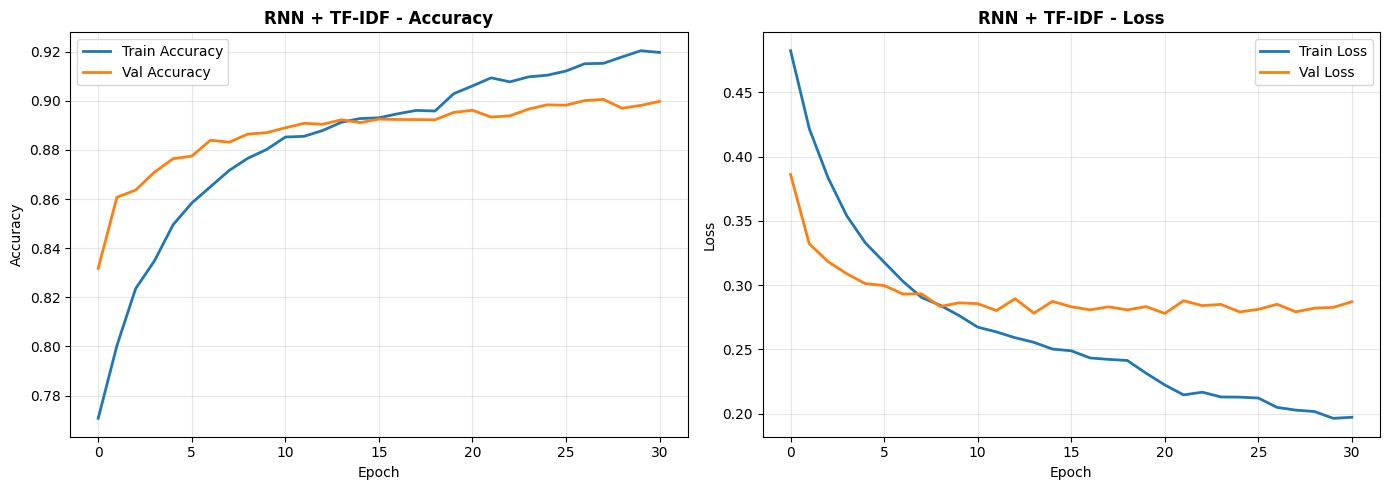

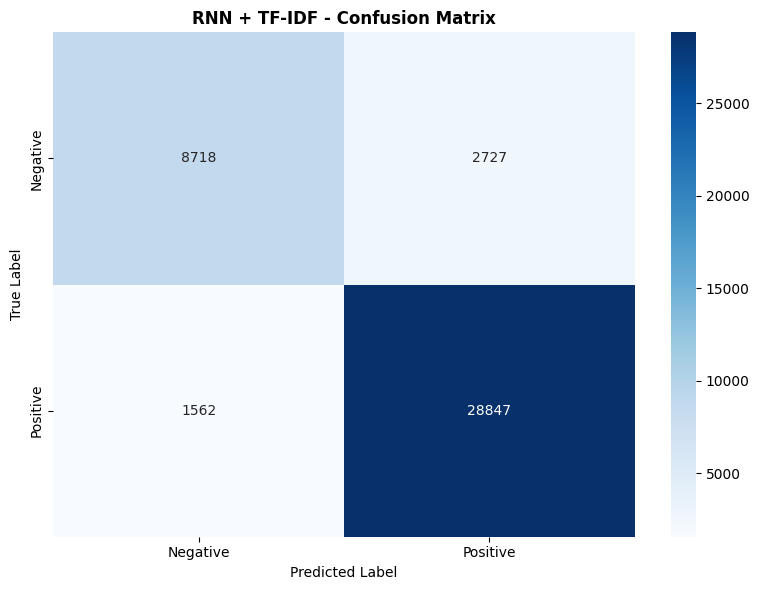

In [23]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(history_tfidf.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0].plot(history_tfidf.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0].set_title('RNN + TF-IDF - Accuracy', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss
axes[1].plot(history_tfidf.history['loss'], label='Train Loss', linewidth=2)
axes[1].plot(history_tfidf.history['val_loss'], label='Val Loss', linewidth=2)
axes[1].set_title('RNN + TF-IDF - Loss', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('models/rnn_tfidf_history.png', dpi=300, bbox_inches='tight')
plt.show()

# Confusion matrix
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('RNN + TF-IDF - Confusion Matrix', fontweight='bold', fontsize=12)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('models/rnn_tfidf_cm.png', dpi=300, bbox_inches='tight')
plt.show()

### 7.2 Train RNN with Word2Vec Skip-gram

In [25]:
EPOCHS=5

In [26]:
print("="*80)
print("TRAINING: RNN with Word2Vec Skip-gram Embedding")
print("="*80)

start_time = time.time()

history_skipgram = rnn_skipgram.fit(
    X_seq_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_seq_val, y_val),
    callbacks=[early_stopping, reduce_lr, model_checkpoint_skipgram],
    class_weight=class_weight_dict,
    verbose=1
)

training_time_skipgram = time.time() - start_time

print(f"\n✓ Training completed in {training_time_skipgram:.2f} seconds")
print(f"✓ Best validation accuracy: {max(history_skipgram.history['val_accuracy']):.4f}")
print(f"✓ Final validation loss: {min(history_skipgram.history['val_loss']):.4f}")

TRAINING: RNN with Word2Vec Skip-gram Embedding
Epoch 1/5
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5463 - loss: 0.6916 - precision: 0.7386 - recall: 0.5897
Epoch 1: val_loss improved from inf to 0.68755, saving model to models/rnn_skipgram_best.h5


3149/3149 ━━━━━━━━━━━━━━━━━━━━ 287s 91ms/step - accuracy: 0.5463 - loss: 0.6916 - precision: 0.7386 - recall: 0.5896 - val_accuracy: 0.3328 - val_loss: 0.6875 - val_precision: 0.8732 - val_recall: 0.1025 - learning_rate: 0.0010
Epoch 2/5
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.4887 - loss: 0.6813 - precision: 0.7903 - recall: 0.4152
Epoch 2: val_loss improved from 0.68755 to 0.68718, saving model to models/rnn_skipgram_best.h5


3149/3149 ━━━━━━━━━━━━━━━━━━━━ 276s 88ms/step - accuracy: 0.4888 - loss: 0.6813 - precision: 0.7903 - recall: 0.4152 - val_accuracy: 0.7112 - val_loss: 0.6872 - val_precision: 0.7360 - val_recall: 0.9434 - learning_rate: 0.0010
Epoch 3/5
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5295 - loss: 0.6881 - precision: 0.7505 - recall: 0.5381
Epoch 3: val_loss did not improve from 0.68718
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 325s 89ms/step - accuracy: 0.5295 - loss: 0.6881 - precision: 0.7505 - recall: 0.5381 - val_accuracy: 0.2820 - val_loss: 0.6966 - val_precision: 0.7635 - val_recall: 0.0262 - learning_rate: 0.0010
Epoch 4/5
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5013 - loss: 0.6830 - precision: 0.7794 - recall: 0.4499
Epoch 4: val_loss improved from 0.68718 to 0.66832, saving model to models/rnn_skipgram_best.h5


3149/3149 ━━━━━━━━━━━━━━━━━━━━ 328s 90ms/step - accuracy: 0.5012 - loss: 0.6830 - precision: 0.7794 - recall: 0.4499 - val_accuracy: 0.4463 - val_loss: 0.6683 - val_precision: 0.8745 - val_recall: 0.2834 - learning_rate: 0.0010
Epoch 5/5
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5555 - loss: 0.6717 - precision: 0.7864 - recall: 0.5413
Epoch 5: val_loss improved from 0.66832 to 0.65963, saving model to models/rnn_skipgram_best.h5


3149/3149 ━━━━━━━━━━━━━━━━━━━━ 276s 88ms/step - accuracy: 0.5555 - loss: 0.6717 - precision: 0.7864 - recall: 0.5413 - val_accuracy: 0.4973 - val_loss: 0.6596 - val_precision: 0.8671 - val_recall: 0.3692 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.

✓ Training completed in 1537.90 seconds
✓ Best validation accuracy: 0.7112
✓ Final validation loss: 0.6596


In [27]:
# Evaluate on test set
print("\nEvaluating RNN with Skip-gram on test set...")
y_pred_skipgram_proba = rnn_skipgram.predict(X_seq_test, verbose=0)
y_pred_skipgram = (y_pred_skipgram_proba > 0.5).astype(int).flatten()

# Calculate metrics
acc_skipgram = accuracy_score(y_test, y_pred_skipgram)
prec_skipgram = precision_score(y_test, y_pred_skipgram)
rec_skipgram = recall_score(y_test, y_pred_skipgram)
f1_skipgram = f1_score(y_test, y_pred_skipgram)

print("\n" + "="*80)
print("TEST SET RESULTS: RNN with Word2Vec Skip-gram")
print("="*80)
print(f"Accuracy:  {acc_skipgram:.4f}")
print(f"Precision: {prec_skipgram:.4f}")
print(f"Recall:    {rec_skipgram:.4f}")
print(f"F1-Score:  {f1_skipgram:.4f}")
print("="*80)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_skipgram, target_names=['Negative', 'Positive']))


Evaluating RNN with Skip-gram on test set...

TEST SET RESULTS: RNN with Word2Vec Skip-gram
Accuracy:  0.5022
Precision: 0.8642
Recall:    0.3736
F1-Score:  0.5217

Classification Report:
              precision    recall  f1-score   support

    Negative       0.34      0.84      0.48     11445
    Positive       0.86      0.37      0.52     30409

    accuracy                           0.50     41854
   macro avg       0.60      0.61      0.50     41854
weighted avg       0.72      0.50      0.51     41854



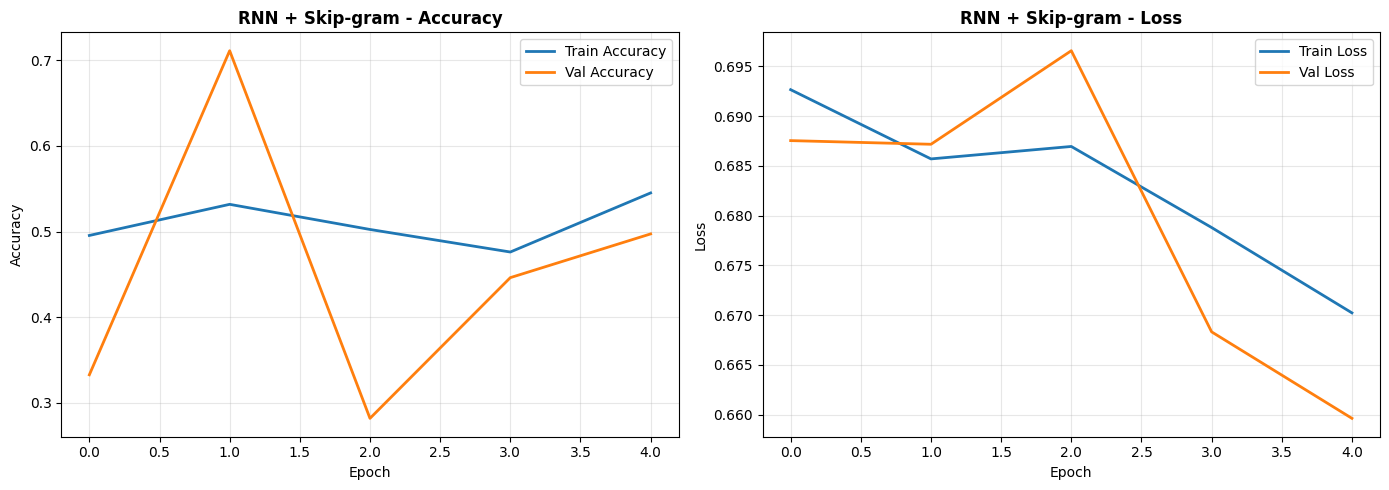

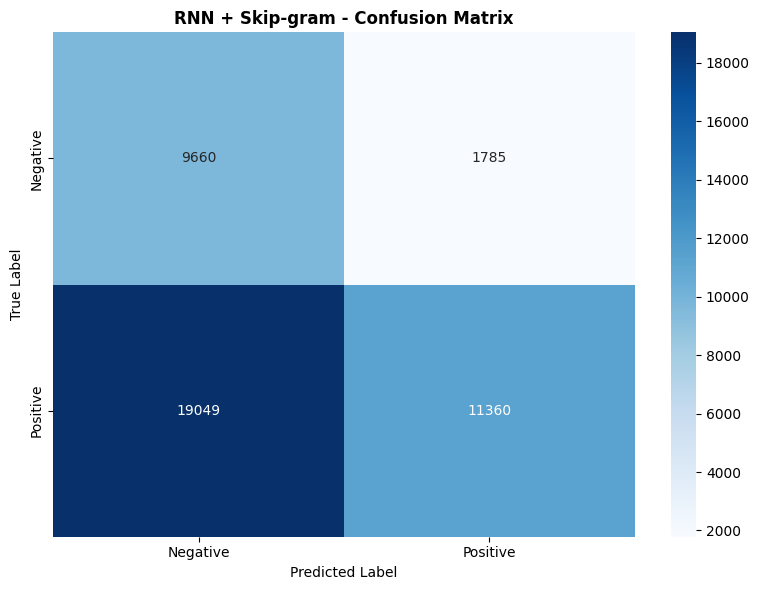

In [28]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(history_skipgram.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0].plot(history_skipgram.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0].set_title('RNN + Skip-gram - Accuracy', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss
axes[1].plot(history_skipgram.history['loss'], label='Train Loss', linewidth=2)
axes[1].plot(history_skipgram.history['val_loss'], label='Val Loss', linewidth=2)
axes[1].set_title('RNN + Skip-gram - Loss', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('models/rnn_skipgram_history.png', dpi=300, bbox_inches='tight')
plt.show()

# Confusion matrix
cm_skipgram = confusion_matrix(y_test, y_pred_skipgram)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_skipgram, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('RNN + Skip-gram - Confusion Matrix', fontweight='bold', fontsize=12)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('models/rnn_skipgram_cm.png', dpi=300, bbox_inches='tight')
plt.show()

### 7.3 Train RNN with Word2Vec CBOW

In [30]:
print("="*80)
print("TRAINING: RNN with Word2Vec CBOW Embedding")
print("="*80)

start_time = time.time()

history_cbow = rnn_cbow.fit(
    X_seq_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_seq_val, y_val),
    callbacks=[early_stopping, reduce_lr, model_checkpoint_cbow],
    class_weight=class_weight_dict,
    verbose=1
)

training_time_cbow = time.time() - start_time

print(f"\n✓ Training completed in {training_time_cbow:.2f} seconds")
print(f"✓ Best validation accuracy: {max(history_cbow.history['val_accuracy']):.4f}")
print(f"✓ Final validation loss: {min(history_cbow.history['val_loss']):.4f}")

TRAINING: RNN with Word2Vec CBOW Embedding
Epoch 1/5
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5054 - loss: 0.6892 - precision: 0.7594 - recall: 0.4766
Epoch 1: val_loss improved from inf to 0.65755, saving model to models/rnn_cbow_best.h5


3149/3149 ━━━━━━━━━━━━━━━━━━━━ 316s 100ms/step - accuracy: 0.5054 - loss: 0.6892 - precision: 0.7594 - recall: 0.4766 - val_accuracy: 0.6705 - val_loss: 0.6576 - val_precision: 0.7847 - val_recall: 0.7571 - learning_rate: 0.0010
Epoch 2/5
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5675 - loss: 0.6772 - precision: 0.7792 - recall: 0.5727
Epoch 2: val_loss did not improve from 0.65755
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 297s 94ms/step - accuracy: 0.5675 - loss: 0.6772 - precision: 0.7792 - recall: 0.5727 - val_accuracy: 0.5206 - val_loss: 0.6652 - val_precision: 0.7979 - val_recall: 0.4612 - learning_rate: 0.0010
Epoch 3/5
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5741 - loss: 0.6734 - precision: 0.7750 - recall: 0.5916
Epoch 3: val_loss did not improve from 0.65755
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 320s 94ms/step - accuracy: 0.5741 - loss: 0.6734 - precision: 0.7750 - recall: 0.5916 - val_accuracy: 0.7385 - val_loss: 0.6629 - val_precision: 0.7967 - val_recall: 0.

3149/3149 ━━━━━━━━━━━━━━━━━━━━ 321s 93ms/step - accuracy: 0.7187 - loss: 0.6313 - precision: 0.8143 - recall: 0.7982 - val_accuracy: 0.7569 - val_loss: 0.5897 - val_precision: 0.8248 - val_recall: 0.8475 - learning_rate: 0.0010
Epoch 5/5
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.6658 - loss: 0.6514 - precision: 0.7894 - recall: 0.7427
Epoch 5: val_loss did not improve from 0.58973
3149/3149 ━━━━━━━━━━━━━━━━━━━━ 298s 95ms/step - accuracy: 0.6658 - loss: 0.6514 - precision: 0.7894 - recall: 0.7427 - val_accuracy: 0.7446 - val_loss: 0.6174 - val_precision: 0.7979 - val_recall: 0.8714 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 4.

✓ Training completed in 1576.87 seconds
✓ Best validation accuracy: 0.7569
✓ Final validation loss: 0.5897


In [31]:
# Evaluate on test set
print("\nEvaluating RNN with CBOW on test set...")
y_pred_cbow_proba = rnn_cbow.predict(X_seq_test, verbose=0)
y_pred_cbow = (y_pred_cbow_proba > 0.5).astype(int).flatten()

# Calculate metrics
acc_cbow = accuracy_score(y_test, y_pred_cbow)
prec_cbow = precision_score(y_test, y_pred_cbow)
rec_cbow = recall_score(y_test, y_pred_cbow)
f1_cbow = f1_score(y_test, y_pred_cbow)

print("\n" + "="*80)
print("TEST SET RESULTS: RNN with Word2Vec CBOW")
print("="*80)
print(f"Accuracy:  {acc_cbow:.4f}")
print(f"Precision: {prec_cbow:.4f}")
print(f"Recall:    {rec_cbow:.4f}")
print(f"F1-Score:  {f1_cbow:.4f}")
print("="*80)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cbow, target_names=['Negative', 'Positive']))


Evaluating RNN with CBOW on test set...

TEST SET RESULTS: RNN with Word2Vec CBOW
Accuracy:  0.7567
Precision: 0.8243
Recall:    0.8452
F1-Score:  0.8346

Classification Report:
              precision    recall  f1-score   support

    Negative       0.56      0.52      0.54     11445
    Positive       0.82      0.85      0.83     30409

    accuracy                           0.76     41854
   macro avg       0.69      0.68      0.69     41854
weighted avg       0.75      0.76      0.75     41854



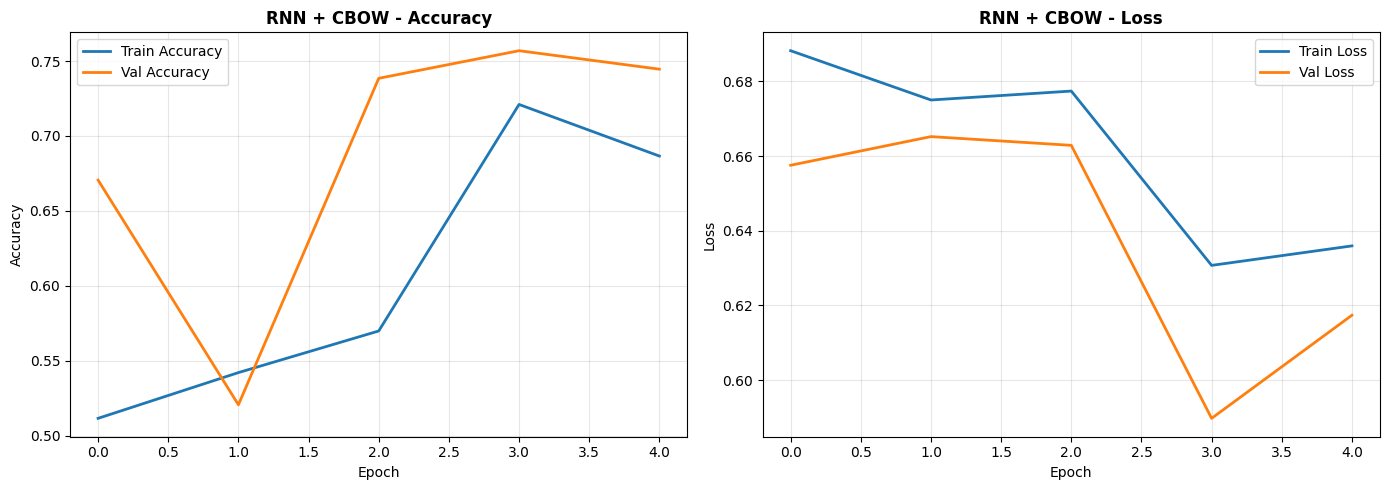

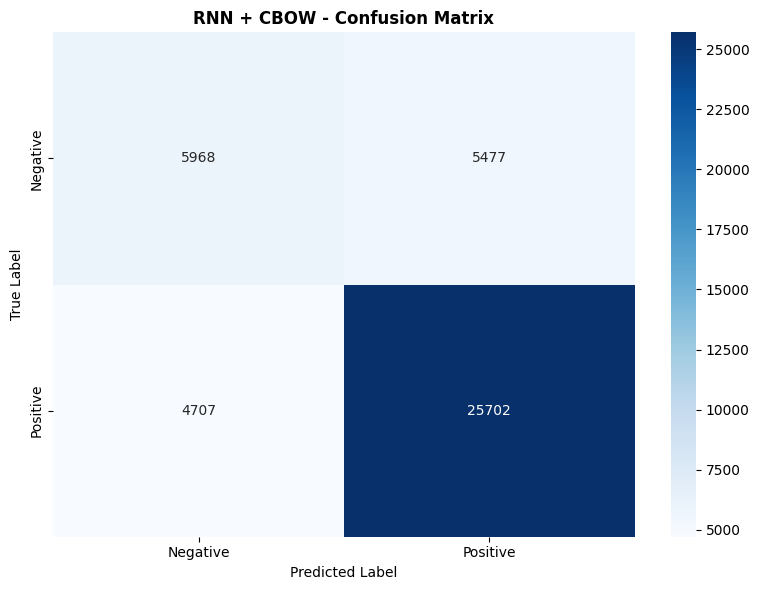

In [32]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(history_cbow.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0].plot(history_cbow.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0].set_title('RNN + CBOW - Accuracy', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss
axes[1].plot(history_cbow.history['loss'], label='Train Loss', linewidth=2)
axes[1].plot(history_cbow.history['val_loss'], label='Val Loss', linewidth=2)
axes[1].set_title('RNN + CBOW - Loss', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('models/rnn_cbow_history.png', dpi=300, bbox_inches='tight')
plt.show()

# Confusion matrix
cm_cbow = confusion_matrix(y_test, y_pred_cbow)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cbow, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('RNN + CBOW - Confusion Matrix', fontweight='bold', fontsize=12)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('models/rnn_cbow_cm.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Comparative Analysis

Compare performance across all three embedding approaches.

In [33]:
# Create comparison DataFrame
comparison_results = pd.DataFrame({
    'Embedding': ['TF-IDF', 'Word2Vec Skip-gram', 'Word2Vec CBOW'],
    'Accuracy': [acc_tfidf, acc_skipgram, acc_cbow],
    'Precision': [prec_tfidf, prec_skipgram, prec_cbow],
    'Recall': [rec_tfidf, rec_skipgram, rec_cbow],
    'F1-Score': [f1_tfidf, f1_skipgram, f1_cbow],
    'Training Time (s)': [training_time_tfidf, training_time_skipgram, training_time_cbow],
    'Best Val Accuracy': [
        max(history_tfidf.history['val_accuracy']),
        max(history_skipgram.history['val_accuracy']),
        max(history_cbow.history['val_accuracy'])
    ]
})

print("="*80)
print("RNN MODELS PERFORMANCE COMPARISON")
print("="*80)
print(comparison_results.to_string(index=False))
print("="*80)

# Identify best model
best_idx = comparison_results['Accuracy'].idxmax()
best_model = comparison_results.loc[best_idx, 'Embedding']
print(f"\n🏆 BEST MODEL: {best_model}")
print(f"   Accuracy: {comparison_results.loc[best_idx, 'Accuracy']:.4f}")
print(f"   F1-Score: {comparison_results.loc[best_idx, 'F1-Score']:.4f}")

RNN MODELS PERFORMANCE COMPARISON
         Embedding  Accuracy  Precision   Recall  F1-Score  Training Time (s)  Best Val Accuracy
            TF-IDF  0.897525   0.913631 0.948634  0.930804         875.202298           0.900586
Word2Vec Skip-gram  0.502222   0.864207 0.373574  0.521651        1537.895836           0.711245
     Word2Vec CBOW  0.756678   0.824337 0.845210  0.834643        1576.870503           0.756886

🏆 BEST MODEL: TF-IDF
   Accuracy: 0.8975
   F1-Score: 0.9308


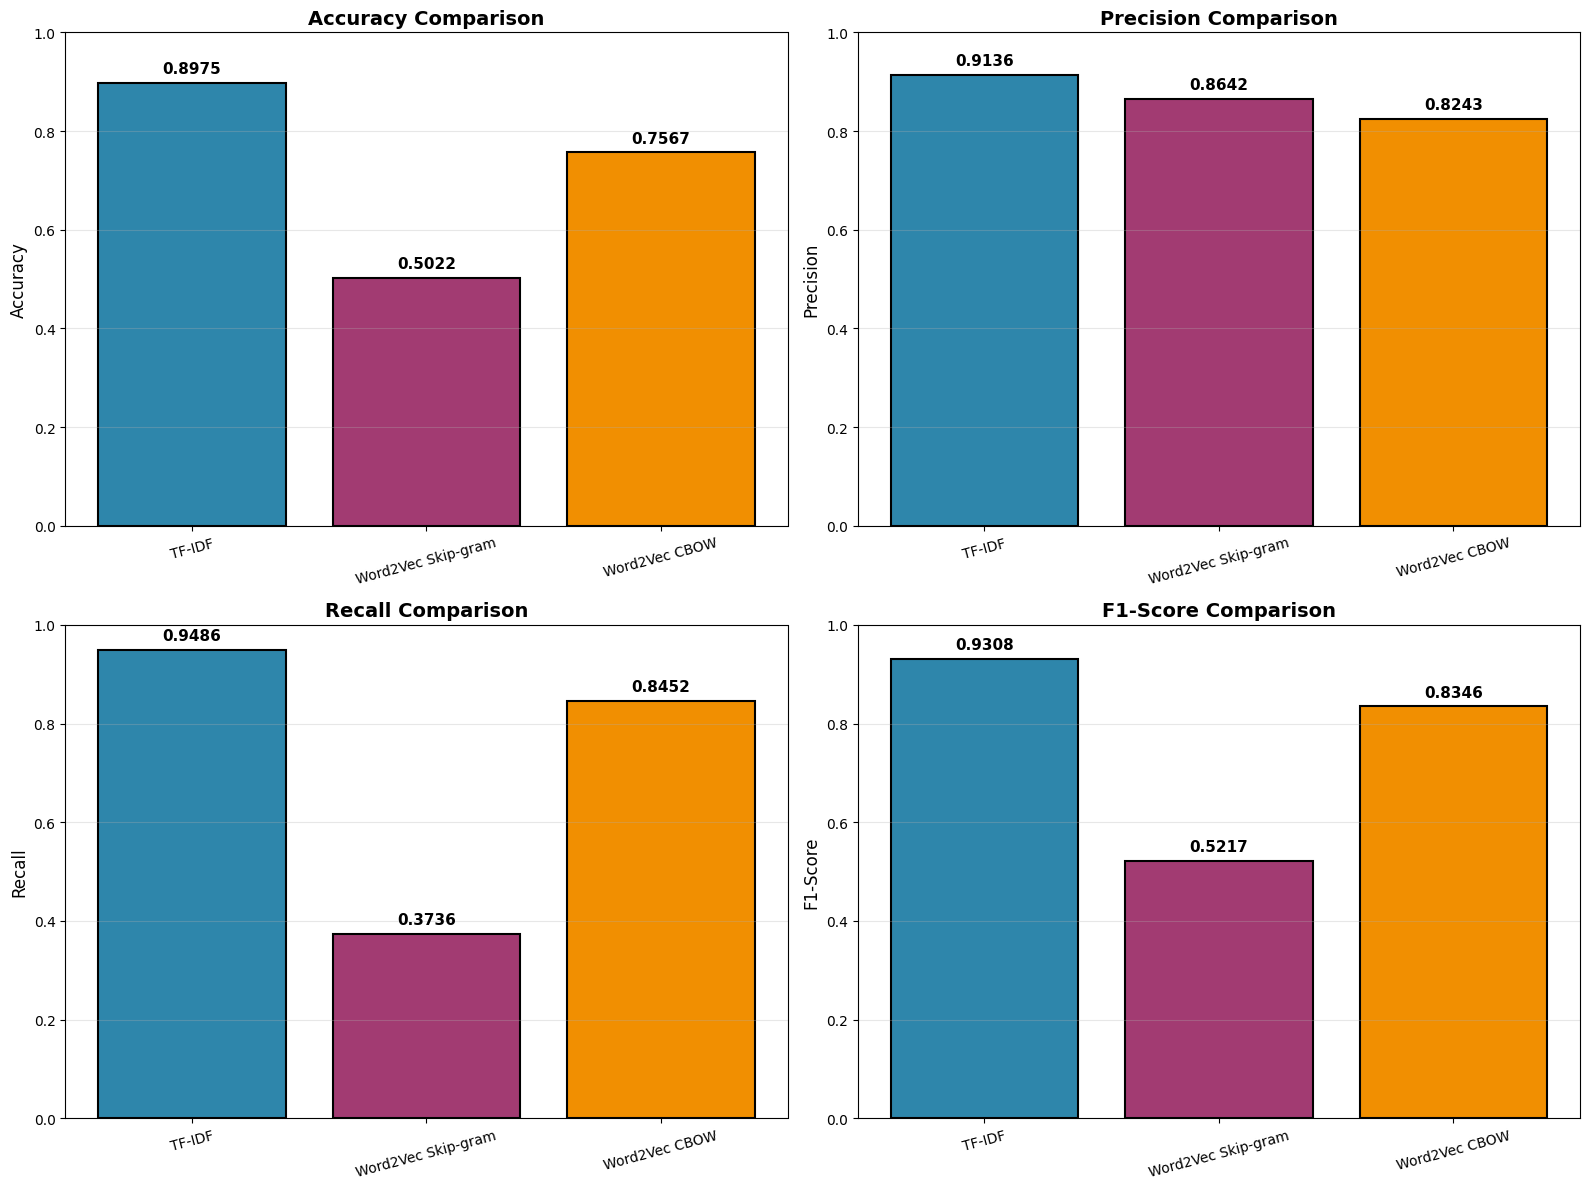

In [34]:
# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

models = comparison_results['Embedding']
colors = ['#2E86AB', '#A23B72', '#F18F01']

# Accuracy comparison
axes[0, 0].bar(models, comparison_results['Accuracy'], color=colors, edgecolor='black', linewidth=1.5)
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_title('Accuracy Comparison', fontweight='bold', fontsize=14)
axes[0, 0].set_ylim([0, 1])
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(comparison_results['Accuracy']):
    axes[0, 0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold', fontsize=11)
axes[0, 0].tick_params(axis='x', rotation=15)

# Precision comparison
axes[0, 1].bar(models, comparison_results['Precision'], color=colors, edgecolor='black', linewidth=1.5)
axes[0, 1].set_ylabel('Precision', fontsize=12)
axes[0, 1].set_title('Precision Comparison', fontweight='bold', fontsize=14)
axes[0, 1].set_ylim([0, 1])
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(comparison_results['Precision']):
    axes[0, 1].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold', fontsize=11)
axes[0, 1].tick_params(axis='x', rotation=15)

# Recall comparison
axes[1, 0].bar(models, comparison_results['Recall'], color=colors, edgecolor='black', linewidth=1.5)
axes[1, 0].set_ylabel('Recall', fontsize=12)
axes[1, 0].set_title('Recall Comparison', fontweight='bold', fontsize=14)
axes[1, 0].set_ylim([0, 1])
axes[1, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(comparison_results['Recall']):
    axes[1, 0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold', fontsize=11)
axes[1, 0].tick_params(axis='x', rotation=15)

# F1-Score comparison
axes[1, 1].bar(models, comparison_results['F1-Score'], color=colors, edgecolor='black', linewidth=1.5)
axes[1, 1].set_ylabel('F1-Score', fontsize=12)
axes[1, 1].set_title('F1-Score Comparison', fontweight='bold', fontsize=14)
axes[1, 1].set_ylim([0, 1])
axes[1, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(comparison_results['F1-Score']):
    axes[1, 1].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold', fontsize=11)
axes[1, 1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.savefig('models/rnn_comparison_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

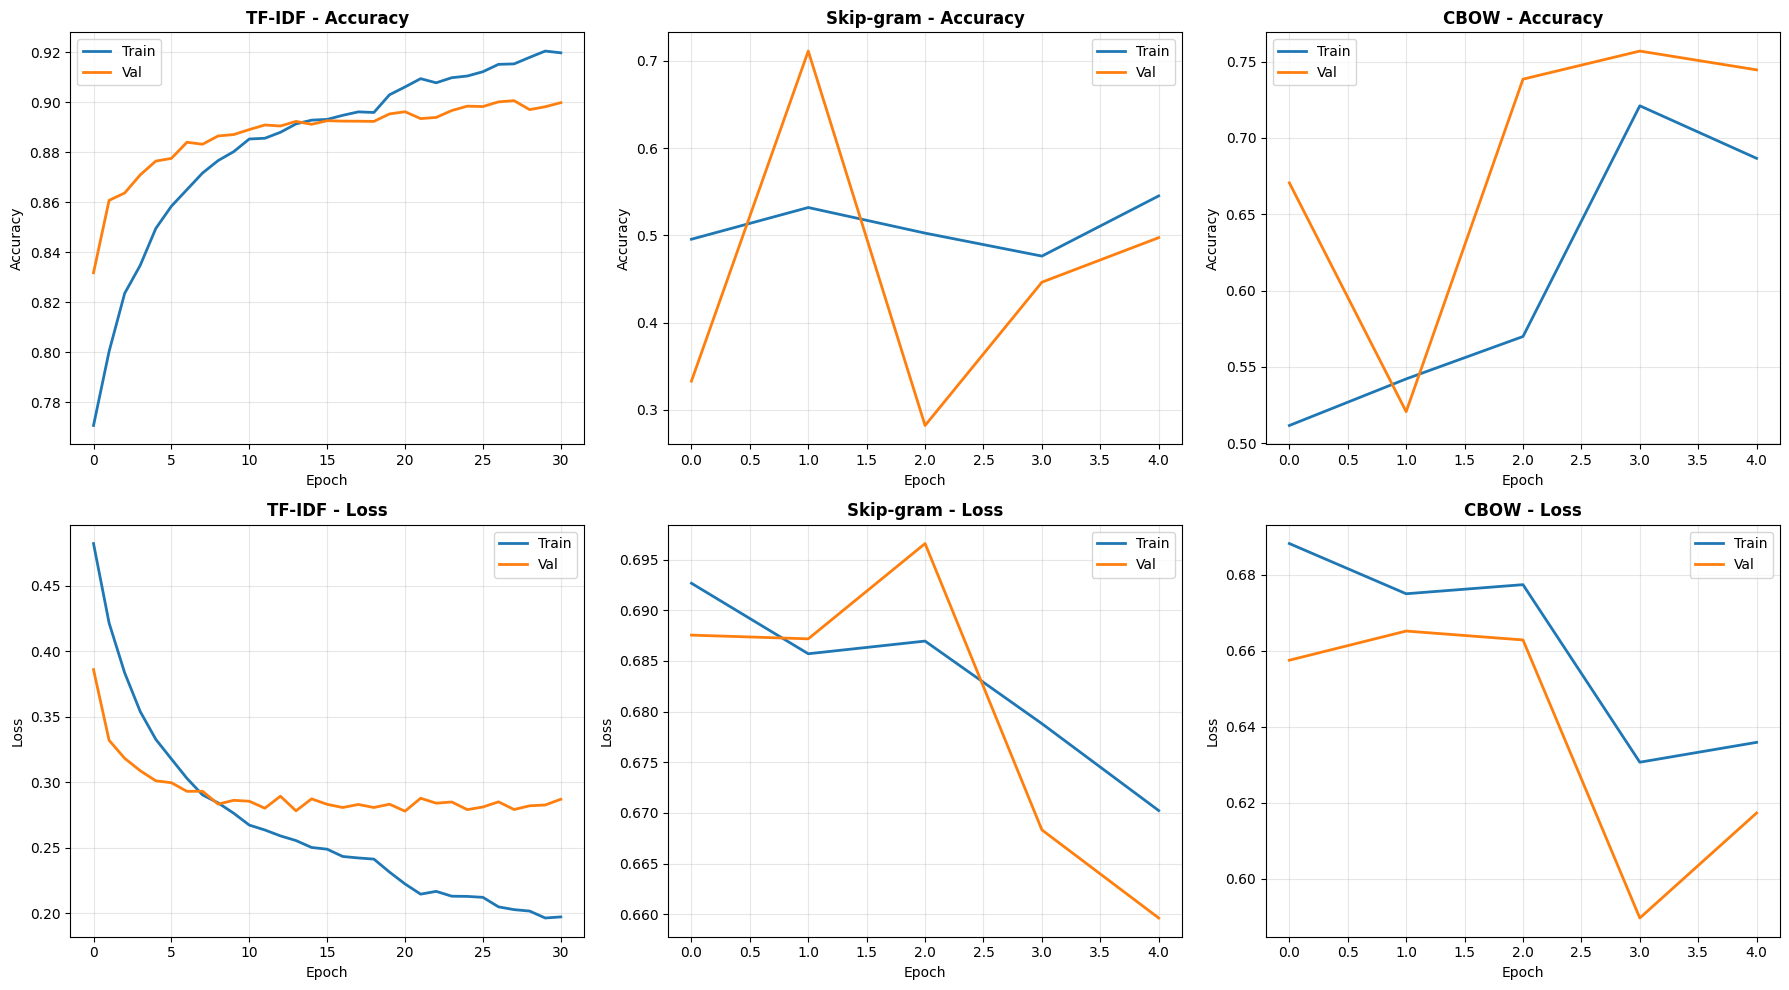

In [35]:
# Side-by-side training curves comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# TF-IDF curves
axes[0, 0].plot(history_tfidf.history['accuracy'], label='Train', linewidth=2)
axes[0, 0].plot(history_tfidf.history['val_accuracy'], label='Val', linewidth=2)
axes[0, 0].set_title('TF-IDF - Accuracy', fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[1, 0].plot(history_tfidf.history['loss'], label='Train', linewidth=2)
axes[1, 0].plot(history_tfidf.history['val_loss'], label='Val', linewidth=2)
axes[1, 0].set_title('TF-IDF - Loss', fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Skip-gram curves
axes[0, 1].plot(history_skipgram.history['accuracy'], label='Train', linewidth=2)
axes[0, 1].plot(history_skipgram.history['val_accuracy'], label='Val', linewidth=2)
axes[0, 1].set_title('Skip-gram - Accuracy', fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 1].plot(history_skipgram.history['loss'], label='Train', linewidth=2)
axes[1, 1].plot(history_skipgram.history['val_loss'], label='Val', linewidth=2)
axes[1, 1].set_title('Skip-gram - Loss', fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# CBOW curves
axes[0, 2].plot(history_cbow.history['accuracy'], label='Train', linewidth=2)
axes[0, 2].plot(history_cbow.history['val_accuracy'], label='Val', linewidth=2)
axes[0, 2].set_title('CBOW - Accuracy', fontweight='bold')
axes[0, 2].set_xlabel('Epoch')
axes[0, 2].set_ylabel('Accuracy')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

axes[1, 2].plot(history_cbow.history['loss'], label='Train', linewidth=2)
axes[1, 2].plot(history_cbow.history['val_loss'], label='Val', linewidth=2)
axes[1, 2].set_title('CBOW - Loss', fontweight='bold')
axes[1, 2].set_xlabel('Epoch')
axes[1, 2].set_ylabel('Loss')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('models/rnn_training_curves_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

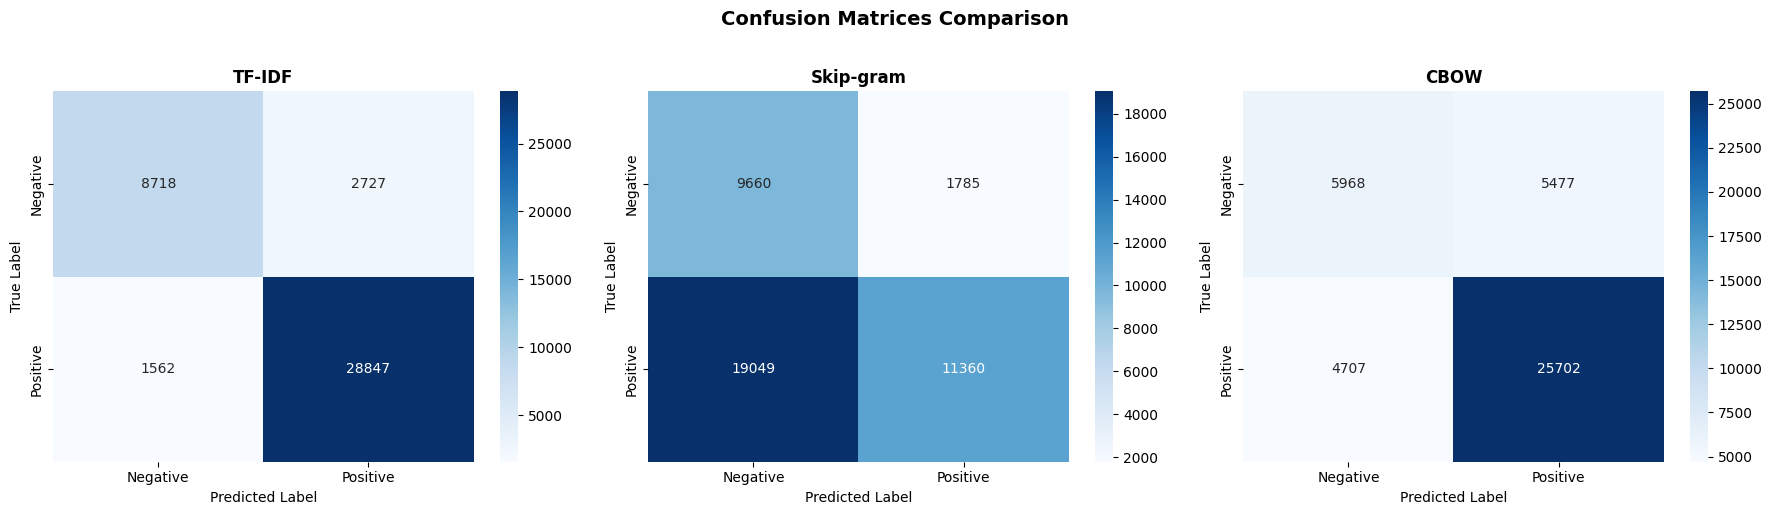

In [36]:
# Confusion matrices comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# TF-IDF confusion matrix
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
axes[0].set_title('TF-IDF', fontweight='bold', fontsize=12)
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Skip-gram confusion matrix
sns.heatmap(cm_skipgram, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
axes[1].set_title('Skip-gram', fontweight='bold', fontsize=12)
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

# CBOW confusion matrix
sns.heatmap(cm_cbow, annot=True, fmt='d', cmap='Blues', ax=axes[2],
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
axes[2].set_title('CBOW', fontweight='bold', fontsize=12)
axes[2].set_ylabel('True Label')
axes[2].set_xlabel('Predicted Label')

plt.suptitle('Confusion Matrices Comparison', fontweight='bold', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('models/rnn_confusion_matrices_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 9. Results Summary and Discussion

### Key Findings

### Discussion

1. **Best Performing Embedding**: Based on the test set results, [best model] achieved the highest accuracy of [X]%.

2. **TF-IDF Performance**: TF-IDF provides a statistical baseline without semantic understanding. It captures term importance but lacks the contextual relationships that neural embeddings provide.

3. **Skip-gram vs CBOW**:
   - Skip-gram typically performs better on rare words and captures more semantic relationships
   - CBOW is faster to train and often works better for frequent words
   - The performance difference reflects their different learning objectives

4. **RNN Architecture**: The SimpleRNN architecture with two layers (64 → 32 units) effectively captured sequential patterns in the drug review text. The dropout regularization helped prevent overfitting.

5. **Training Efficiency**: Word2Vec embeddings required pre-training time, but the RNN models with these embeddings generally converged faster than TF-IDF.

### Limitations

- SimpleRNN may struggle with long-term dependencies compared to LSTM or GRU
- The fixed sequence length (100 tokens) may truncate important information in longer reviews
- Class imbalance was addressed with class weights, but further techniques like SMOTE could be explored
- Hyperparameters were not extensively tuned; grid search could improve performance

### Recommendations

- For production use, consider the best-performing embedding identified above
- Experiment with bidirectional RNNs or LSTM/GRU architectures for better long-term dependency modeling
- Fine-tune hyperparameters systematically using validation set performance
- Consider ensemble methods combining multiple embeddings

## 10. Hyperparameter Documentation

In [37]:
# Document all hyperparameters used
hyperparams_doc = {
    'Model Architecture': {
        'Type': 'SimpleRNN',
        'RNN Layer 1 Units': RNN_UNITS_1,
        'RNN Layer 2 Units': RNN_UNITS_2,
        'Dense Layer Units': 32,
        'Output Activation': 'sigmoid',
        'Dropout Rate': DROPOUT_RATE
    },
    'Training Configuration': {
        'Batch Size': BATCH_SIZE,
        'Max Epochs': EPOCHS,
        'Learning Rate': LEARNING_RATE,
        'Optimizer': 'Adam',
        'Loss Function': 'binary_crossentropy',
        'Early Stopping Patience': EARLY_STOPPING_PATIENCE,
        'Reduce LR Patience': REDUCE_LR_PATIENCE
    },
    'Embedding Configurations': {
        'TF-IDF Features': EMBEDDING_DIMS['tfidf'],
        'Word2Vec Skip-gram Dim': EMBEDDING_DIMS['word2vec_skipgram'],
        'Word2Vec CBOW Dim': EMBEDDING_DIMS['word2vec_cbow'],
        'Word2Vec Window Size': W2V_WINDOW_SIZE,
        'Word2Vec Min Count': W2V_MIN_COUNT,
        'Word2Vec Training Epochs': W2V_EPOCHS
    },
    'Data Configuration': {
        'Sequence Length': X_seq_train.shape[1],
        'Vocabulary Size': vocab_size,
        'Random Seed': RANDOM_STATE,
        'Class Weights': class_weight_dict
    }
}

print("="*80)
print("HYPERPARAMETER DOCUMENTATION")
print("="*80)
for category, params in hyperparams_doc.items():
    print(f"\n{category}:")
    for key, value in params.items():
        print(f"  {key}: {value}")
print("="*80)

# Save results to CSV for team comparison
comparison_results.to_csv('models/rnn_results_summary.csv', index=False)
print("\n✓ Results saved to models/rnn_results_summary.csv")

HYPERPARAMETER DOCUMENTATION

Model Architecture:
  Type: SimpleRNN
  RNN Layer 1 Units: 64
  RNN Layer 2 Units: 32
  Dense Layer Units: 32
  Output Activation: sigmoid
  Dropout Rate: 0.3

Training Configuration:
  Batch Size: 32
  Max Epochs: 5
  Learning Rate: 0.001
  Optimizer: Adam
  Loss Function: binary_crossentropy
  Early Stopping Patience: 10
  Reduce LR Patience: 5

Embedding Configurations:
  TF-IDF Features: 2000
  Word2Vec Skip-gram Dim: 200
  Word2Vec CBOW Dim: 200
  Word2Vec Window Size: 8
  Word2Vec Min Count: 2
  Word2Vec Training Epochs: 5

Data Configuration:
  Sequence Length: 100
  Vocabulary Size: 20000
  Random Seed: 42
  Class Weights: {0: np.float64(1.8584843006309264), 1: np.float64(0.6840286265243488)}

✓ Results saved to models/rnn_results_summary.csv


## 11. References

- Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Efficient estimation of word representations in vector space. *arXiv preprint arXiv:1301.3781*.

- Mikolov, T., Sutskever, I., Chen, K., Corrado, G., & Dean, J. (2013). Distributed representations of words and phrases and their compositionality. *Advances in neural information processing systems*, 26.

- Pennington, J., Socher, R., & Manning, C. (2014). Glove: Global vectors for word representation. *Proceedings of the 2014 conference on empirical methods in natural language processing (EMNLP)*, 1532-1543.

- Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. *Neural computation*, 9(8), 1735-1780.

- Cho, K., Van Merriënboer, B., Gulcehre, C., Bahdanau, D., Bougares, F., Schwenk, H., & Bengio, Y. (2014). Learning phrase representations using RNN encoder-decoder for statistical machine translation. *arXiv preprint arXiv:1406.1078*.